## LOAD AND PREPARE THE DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('ks-projects-201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Convert to Time Series

In [3]:
import datetime as dt

In [4]:
data["launched_date"] = data["launched"].apply(lambda x: dt.datetime.strptime(x[:10], '%Y-%m-%d'))
data["deadline_date"] = data["deadline"].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
projects = data.set_index(pd.DatetimeIndex(data["launched_date"]))

In [6]:
projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date
launched_date,,,,,,,,,,,,,,,,,
2015-08-11,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11,2015-10-09
2017-09-02,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02,2017-11-01
2013-01-12,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12,2013-02-26
2012-03-17,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17,2012-04-16
2015-07-04,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04,2015-08-29


In [7]:
projects = data.set_index(pd.DatetimeIndex(data["launched_date"]))
before = len(projects)
before

378661

### Data Cleaning

In [8]:
projects = projects[projects['state'] != 'live'] # Get rid of live projects
projects = projects[projects['state'] != 'canceled'] # Get rid of cancelled projects
projects = projects[projects['state'] != 'suspended'] # Get rid of suspended projects
projects = projects[projects['state'] != 'undefined'] # Get rid of undefined projects

projects = projects[projects['usd_goal_real'] < projects['usd_pledged_real'].max()]
# Get rid of projects with crazy high unattainable goals
projects = projects[projects['usd_goal_real'] > 100] # Get rid of projects with crazy high unattainable goals
projects = projects[(projects.index > "2009-01-01")] # Made before Kickstarter was founded

projects = projects[projects['country'] != 'N,0"'] # Wrong country code (210 entries)
print(len(projects))
weird = projects[(projects['backers'] == 0) & (projects['usd_pledged_real'] > 0)]['ID'].values



326112


In [9]:
projects['usd_pledged_real'].max()

20338986.27

In [10]:
projects[(projects['backers'] == 0) & (projects['usd_pledged_real'] > 0)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date
launched_date,,,,,,,,,,,,,,,,,
2016-04-05,1354010125,The Falcon Fly By,Film & Video,Film & Video,USD,2016-06-04,5000.0,2016-04-05 15:08:31,1.0,failed,0,US,0.0,1.0,5000.0,2016-04-05,2016-06-04
2014-11-19,2044861703,iStandUp!,Product Design,Design,USD,2014-12-31,50000.0,2014-11-19 19:20:02,218.0,failed,0,US,218.0,218.0,50000.0,2014-11-19,2014-12-31
2010-07-02,950767056,Sins Of A Son,Documentary,Film & Video,USD,2010-09-04,3500.0,2010-07-02 23:41:15,1.0,failed,0,US,1.0,1.0,3500.0,2010-07-02,2010-09-04


In [11]:
print("{} in dataset".format(len(projects)))
print("{} removed".format(before - len(projects)))

326112 in dataset
52549 removed


### Set Target Variable 'Result' (1 if project succeeded else 0)

In [12]:
projects['result'] = projects['state'].apply(lambda x: 1 if x == 'successful' else 0)

In [13]:
projects['result'][:5]

launched_date
2015-08-11    0
2017-09-02    0
2013-01-12    0
2012-03-17    0
2016-02-26    1
Name: result, dtype: int64

## NAMES ANALYSIS

In [14]:
from collections import Counter # counts frequency of words
from nltk.corpus import stopwords # stopwords dataset
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Will\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def make_dictionary(reviews):
    all_words = []
    for review in reviews:
        review = str(review)
        review = review.lower()
        words = review.split()
        all_words += words
                
    dictionary = Counter(all_words)            
    list_to_remove = list(dictionary)
    stop_words = set(stopwords.words('english')) 
    # grab the English list of stop words from the NLTK module
    
    for item in list_to_remove:
#         if item in stop_words: 
#    # remove common stopwords - both ham and spam will have lots of these
#             del dictionary[item]
        if item.isalpha() == False:
   # remove words that aren't entirely alphabetical characters
            del dictionary[item]
        elif len(item) == 1: 
   # remove words with a single character (spaces, symbols)
            del dictionary[item]
    dictionary = dictionary.most_common(3000)
    
    return dictionary

In [18]:
project_names = projects["name"]
#all_reviews = reviews["reviews.text"]
bag_of_words = make_dictionary(project_names)

In [19]:
bag_of_words[:10]

[('the', 88836),
 ('of', 32645),
 ('and', 22003),
 ('for', 20469),
 ('to', 17902),
 ('in', 15416),
 ('new', 12052),
 ('album', 9296),
 ('film', 9243),
 ('project', 8817)]

#### Successful Projects

In [20]:
successful_projects = projects[projects['result'] == 1]
successful_words = make_dictionary(successful_projects["name"])

In [21]:
successful_words[:10]

[('the', 38618),
 ('of', 13753),
 ('and', 8671),
 ('for', 7942),
 ('to', 7031),
 ('new', 6609),
 ('in', 6597),
 ('album', 5484),
 ('film', 5118),
 ('by', 4677)]

#### Failed Projects

In [22]:
failed_projects = projects[projects['result'] == 0]
failed_words = make_dictionary(failed_projects["name"])

In [23]:
failed_words[:10]

[('the', 50218),
 ('of', 18892),
 ('and', 13332),
 ('for', 12527),
 ('to', 10871),
 ('in', 8819),
 ('new', 5443),
 ('project', 5322),
 ('your', 4994),
 ('with', 4458)]

### Time Series Category --> Move Later

In [24]:
projects["main_category"].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

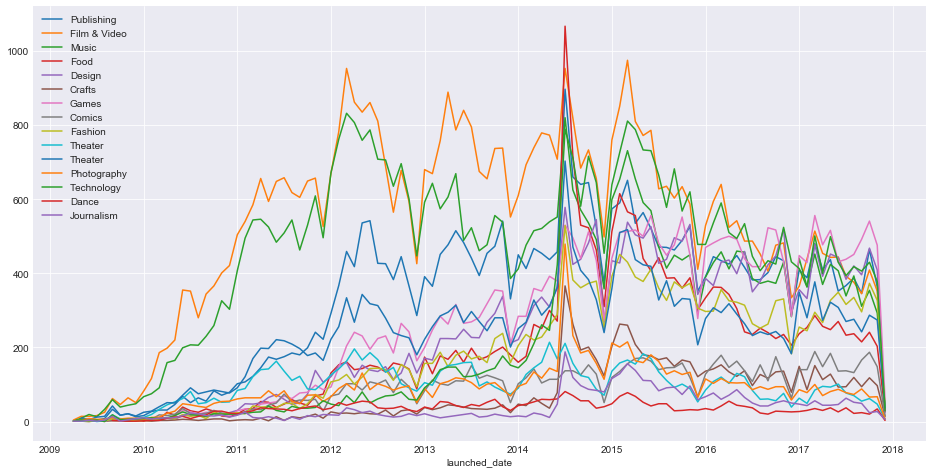

In [25]:
plt.figure(figsize=(16,6))
projects[projects["main_category"] == 'Publishing'].resample('M').count()["result"].plot(figsize=(16,8), label='Publishing')
projects[projects["main_category"] == 'Film & Video'].resample('M').count()["result"].plot(figsize=(16,8), label='Film & Video')
projects[projects["main_category"] == 'Music'].resample('M').count()["result"].plot(figsize=(16,8), label='Music')
projects[projects["main_category"] == 'Food'].resample('M').count()["result"].plot(figsize=(16,8), label='Food')
projects[projects["main_category"] == 'Design'].resample('M').count()["result"].plot(figsize=(16,8), label='Design')
projects[projects["main_category"] == 'Crafts'].resample('M').count()["result"].plot(figsize=(16,8), label='Crafts')
projects[projects["main_category"] == 'Games'].resample('M').count()["result"].plot(figsize=(16,8), label='Games')
projects[projects["main_category"] == 'Comics'].resample('M').count()["result"].plot(figsize=(16,8), label='Comics')
projects[projects["main_category"] == 'Fashion'].resample('M').count()["result"].plot(figsize=(16,8), label='Fashion')
projects[projects["main_category"] == 'Theater'].resample('M').count()["result"].plot(figsize=(16,8), label='Theater')
projects[projects["main_category"] == 'Art'].resample('M').count()["result"].plot(figsize=(16,8), label='Theater')
projects[projects["main_category"] == 'Photography'].resample('M').count()["result"].plot(figsize=(16,8), label='Photography')
projects[projects["main_category"] == 'Technology'].resample('M').count()["result"].plot(figsize=(16,8), label='Technology')
projects[projects["main_category"] == 'Dance'].resample('M').count()["result"].plot(figsize=(16,8), label='Dance')
projects[projects["main_category"] == 'Journalism'].resample('M').count()["result"].plot(figsize=(16,8), label='Journalism')

plt.legend()
#plt.xlabel('Project Launch Date')
#plt.ylabel('Project Count')
#plt.title('Analysis of Project Category by Launch Date')

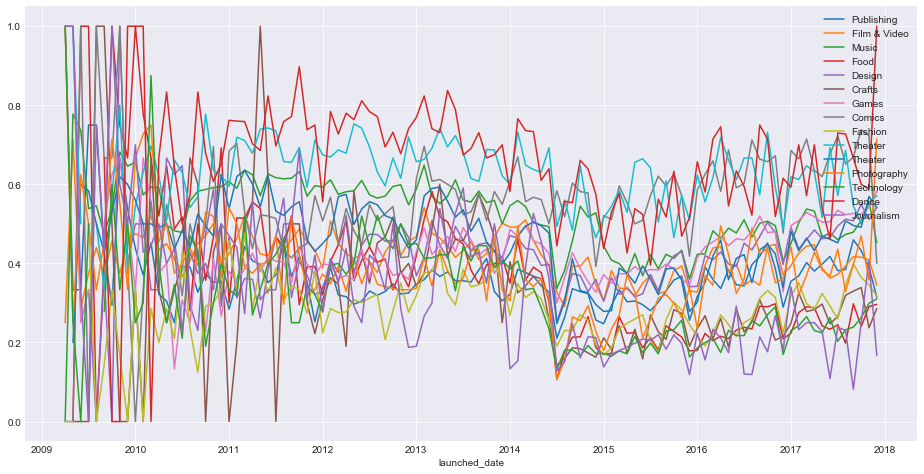

In [26]:
plt.figure(figsize=(16,6))
projects[projects["main_category"] == 'Publishing'].resample('M').mean()["result"].plot(figsize=(16,8), label='Publishing')
projects[projects["main_category"] == 'Film & Video'].resample('M').mean()["result"].plot(figsize=(16,8), label='Film & Video')
projects[projects["main_category"] == 'Music'].resample('M').mean()["result"].plot(figsize=(16,8), label='Music')
projects[projects["main_category"] == 'Food'].resample('M').mean()["result"].plot(figsize=(16,8), label='Food')
projects[projects["main_category"] == 'Design'].resample('M').mean()["result"].plot(figsize=(16,8), label='Design')
projects[projects["main_category"] == 'Crafts'].resample('M').mean()["result"].plot(figsize=(16,8), label='Crafts')
projects[projects["main_category"] == 'Games'].resample('M').mean()["result"].plot(figsize=(16,8), label='Games')
projects[projects["main_category"] == 'Comics'].resample('M').mean()["result"].plot(figsize=(16,8), label='Comics')
projects[projects["main_category"] == 'Fashion'].resample('M').mean()["result"].plot(figsize=(16,8), label='Fashion')
projects[projects["main_category"] == 'Theater'].resample('M').mean()["result"].plot(figsize=(16,8), label='Theater')
projects[projects["main_category"] == 'Art'].resample('M').mean()["result"].plot(figsize=(16,8), label='Theater')
projects[projects["main_category"] == 'Photography'].resample('M').mean()["result"].plot(figsize=(16,8), label='Photography')
projects[projects["main_category"] == 'Technology'].resample('M').mean()["result"].plot(figsize=(16,8), label='Technology')
projects[projects["main_category"] == 'Dance'].resample('M').mean()["result"].plot(figsize=(16,8), label='Dance')
projects[projects["main_category"] == 'Journalism'].resample('M').mean()["result"].plot(figsize=(16,8), label='Journalism')

plt.legend()
#plt.xlabel('Project Launch Date')
#plt.ylabel('Project Count')
#plt.title('Analysis of Project Category by Launch Date')

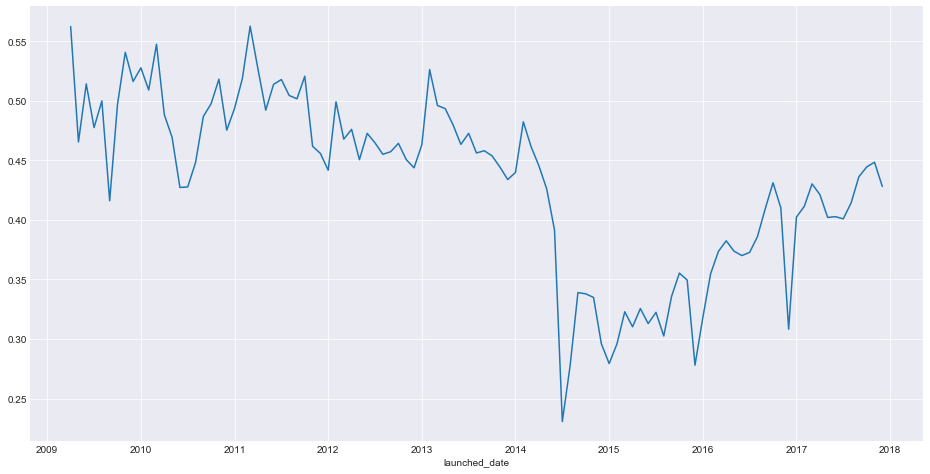

In [27]:
projects.resample('M').mean()['result'].plot(figsize=(16,8))

In [28]:
projects['state'].value_counts()

failed        195395
successful    130717
Name: state, dtype: int64

In [29]:
projects['result'].value_counts()/len(projects)

0    0.599165
1    0.400835
Name: result, dtype: float64

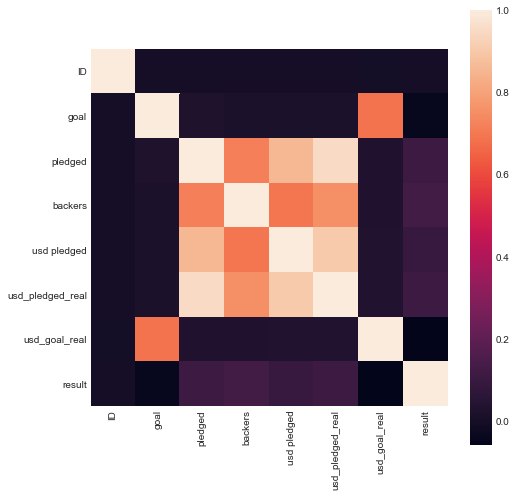

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(projects.corr(), square=True)

## COUNTRY ANALYSIS

In [31]:
projects['country'].describe()

count     326112
unique        22
top           US
freq      257245
Name: country, dtype: object

### Project Count by Country

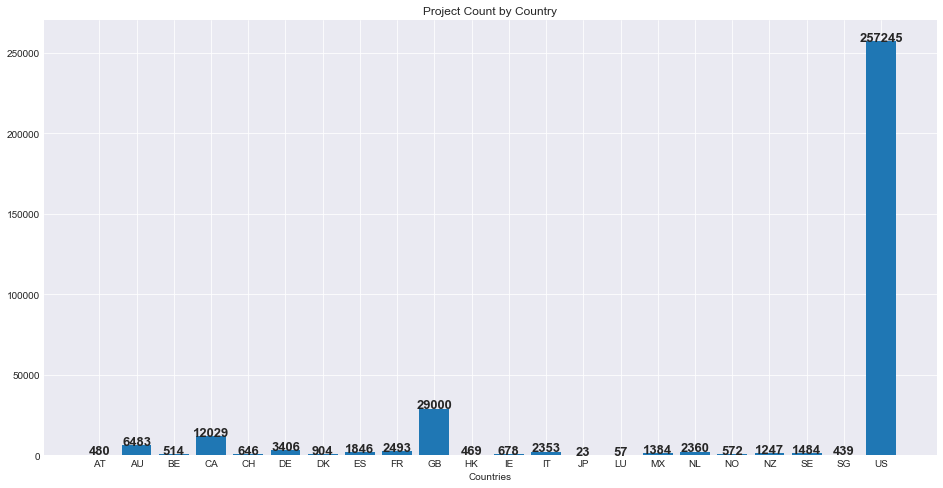

In [32]:
country_count = projects['country'].value_counts()


plt.figure(figsize=(16,8))
plt.bar(country_count.index, country_count.values)
plt.xlabel('Countries')
plt.title("Project Count by Country")

for a, b in zip(country_count.index, country_count):
    plt.text(a, b, str(b), ha='center', va='baseline', size=13, fontweight='bold')

In [33]:
# country_pct = projects.groupby(['country']).agg({'sales': 'sum'})
# # Change: groupby state_office and divide by sum
# state_pcts = state_office.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))

### United States

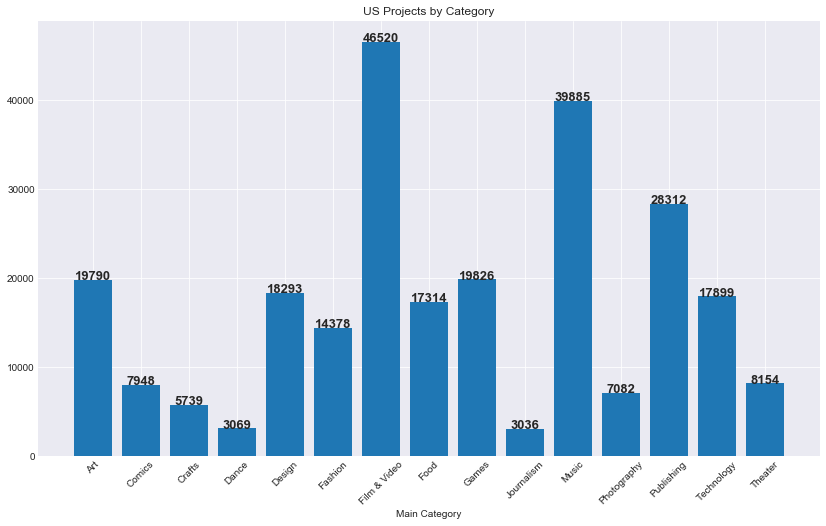

In [34]:
US = projects[projects['country'] == "US"]
US_count = pd.value_counts(US.main_category)

plt.figure(figsize=(14,8))            
plt.bar(US_count.index, US_count)
plt.xlabel('Main Category')
plt.xticks(rotation=45)
plt.title('US Projects by Category')

for a, b in zip(US_count.index, US_count):
    plt.text(a, b, str(b), ha='center', va='baseline', size=13, fontweight='bold')

### Great Britain

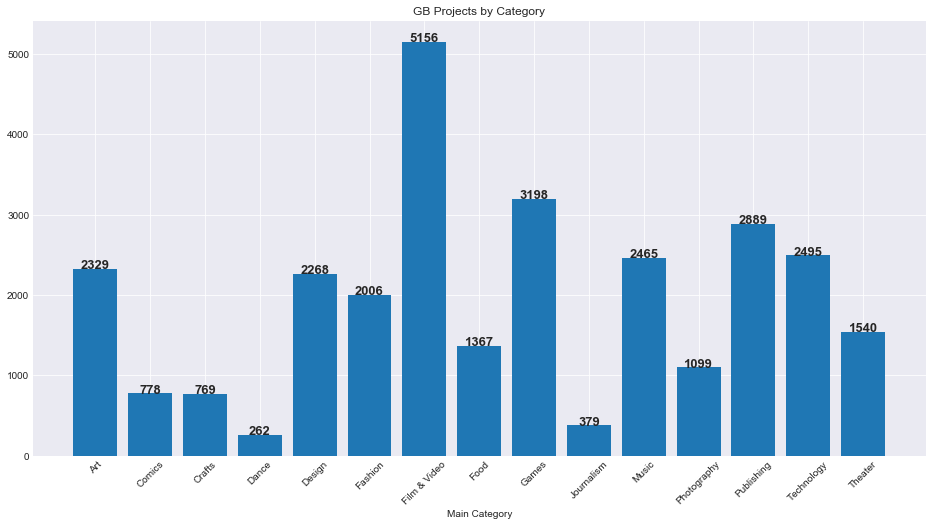

In [35]:
GB = projects[projects['country'] == "GB"]
GB_count = pd.value_counts(GB.main_category)
            
plt.figure(figsize=(16,8))            
plt.bar(GB_count.index, GB_count)
plt.xlabel('Main Category')
plt.xticks(rotation=45)
plt.title('GB Projects by Category')

for a, b in zip(GB_count.index, GB_count):
    plt.text(a, b, str(b), ha='center', va='baseline', size=13, fontweight='bold')

### Canada

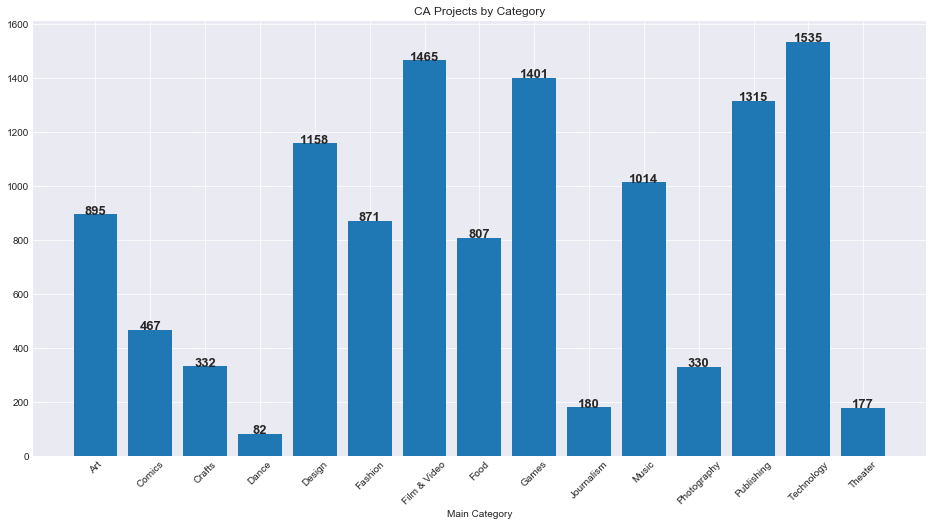

In [36]:
CA = projects[projects['country'] == "CA"]
CA_count = pd.value_counts(CA.main_category)
            
plt.figure(figsize=(16,8))            
plt.bar(CA_count.index, CA_count)
plt.xlabel('Main Category')
plt.xticks(rotation=45)
plt.title('CA Projects by Category')

for a, b in zip(CA_count.index, CA_count):
    plt.text(a, b, str(b), ha='center', va='baseline', size=13, fontweight='bold')

##TIME SERIES ANALYSIS

### Project Count Over Time

Text(0,0.5,'Project Success Rate')

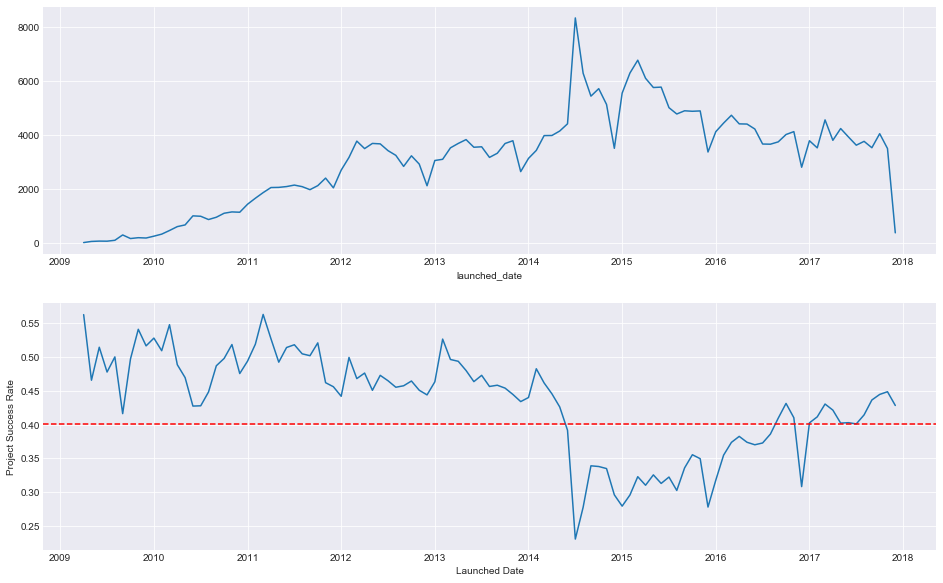

In [37]:
plt.subplots(2, 1, figsize=(16,10))
plt.subplot(2, 1, 1)
projects.resample('M').count()['ID'].plot()

plt.subplot(2, 1, 2)
projects.resample('M').mean()["result"].plot()
plt.axhline(y=projects['result'].mean(), color='r', linestyle='--')
plt.xlabel('Launched Date')
plt.ylabel('Project Success Rate')

Text(0.5,1,'Number of Kickstarter Projects Launched over Time')

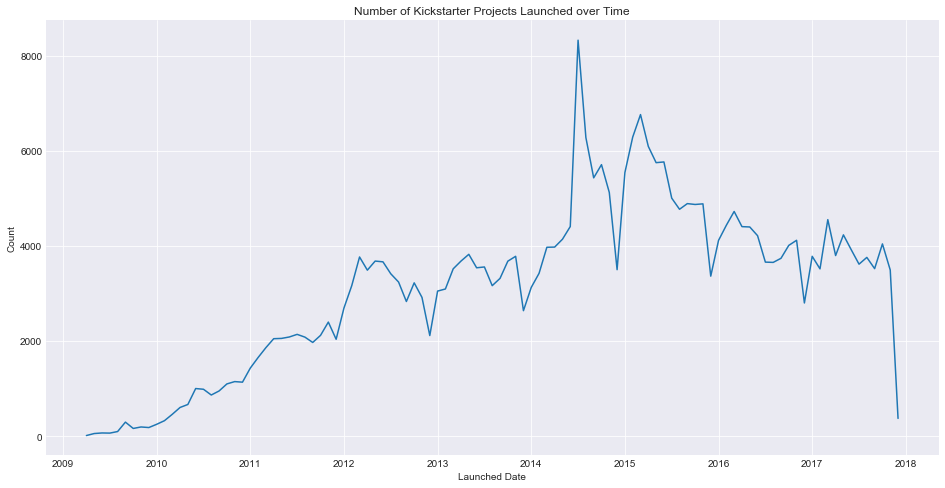

In [38]:
projects.resample('M').count()['ID'].plot(figsize=(16,8))
plt.xlabel('Launched Date')
plt.ylabel('Count')
plt.title('Number of Kickstarter Projects Launched over Time')

In [39]:
projects.resample('M')['ID'].count()['2014']

launched_date
2014-01-31    3130
2014-02-28    3426
2014-03-31    3974
2014-04-30    3978
2014-05-31    4143
2014-06-30    4410
2014-07-31    8328
2014-08-31    6282
2014-09-30    5434
2014-10-31    5711
2014-11-30    5127
2014-12-31    3503
Freq: M, Name: ID, dtype: int64

### Project Success Rate over Time

Text(0.5,1,'Project Success Rate Over Time')

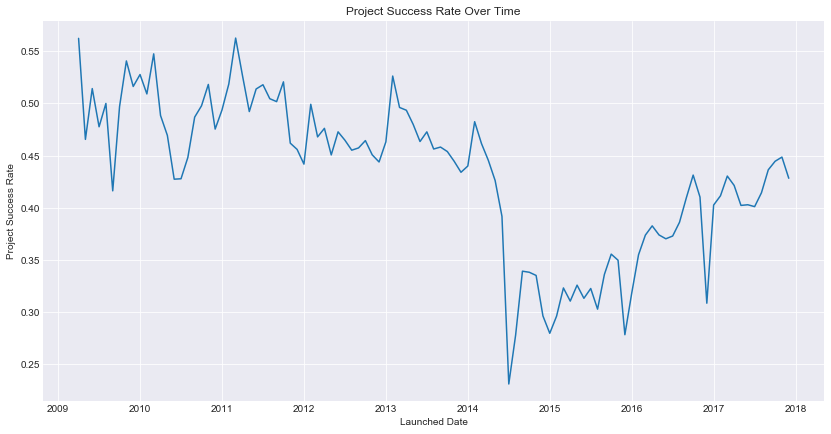

In [40]:
projects.resample('M').mean()["result"].plot(figsize=(14,7))
plt.xlabel('Launched Date')
plt.ylabel('Project Success Rate')
plt.title('Project Success Rate Over Time')

In [41]:
projects.resample('M')['result'].mean().min()

0.23066762728146015

### Count of Successful Projects over Time

Text(0.5,1,'Count of Successful Projects Over Time')

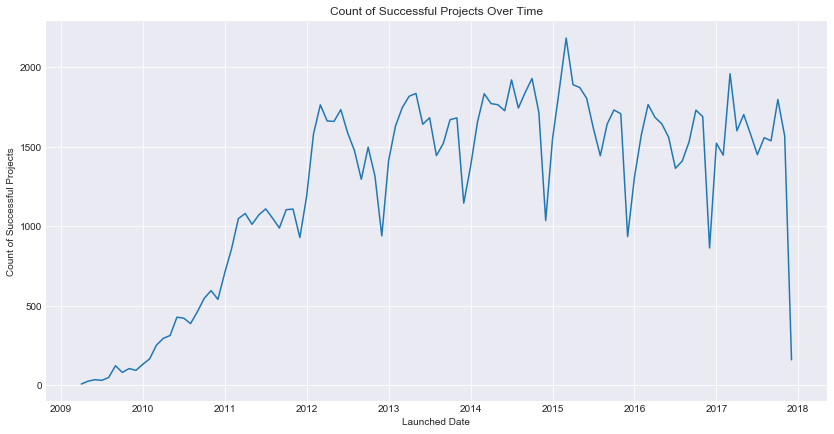

In [42]:
kickstarted = projects[projects['result'] == 1]
kickstarted.resample('M')['ID'].count().plot(figsize=(14,7))
plt.xlabel('Launched Date')
plt.ylabel('Count of Successful Projects')
plt.title('Count of Successful Projects Over Time')

### Success Rate by Month

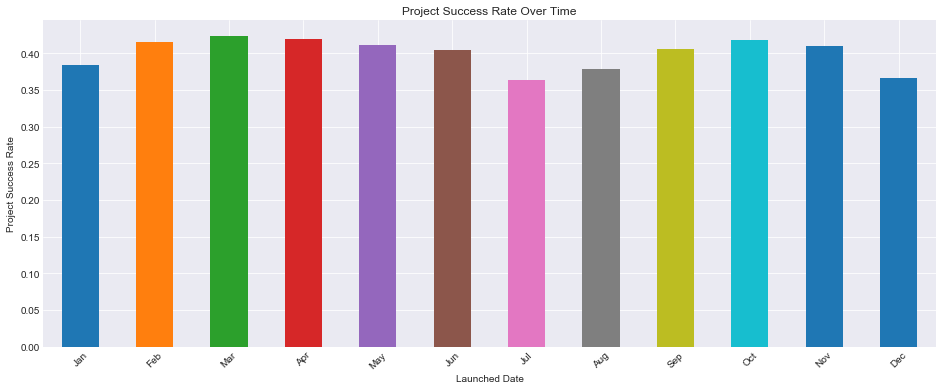

In [43]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(16,6))
projects.groupby(lambda x: x.month)['result'].mean().plot('bar')
plt.xticks(np.arange(12), months, rotation=45)
plt.xlabel('Launched Date') # Not sure if the month is launch date or deadline
plt.ylabel('Project Success Rate')
plt.title('Project Success Rate Over Time')
plt.show()

In [44]:
projects.groupby(lambda x: x.month)['result'].mean()

1     0.383292
2     0.415609
3     0.423693
4     0.420055
5     0.410587
6     0.403841
7     0.363309
8     0.378343
9     0.405992
10    0.417934
11    0.409230
12    0.365988
Name: result, dtype: float64

### Number of Successful Projects over Time

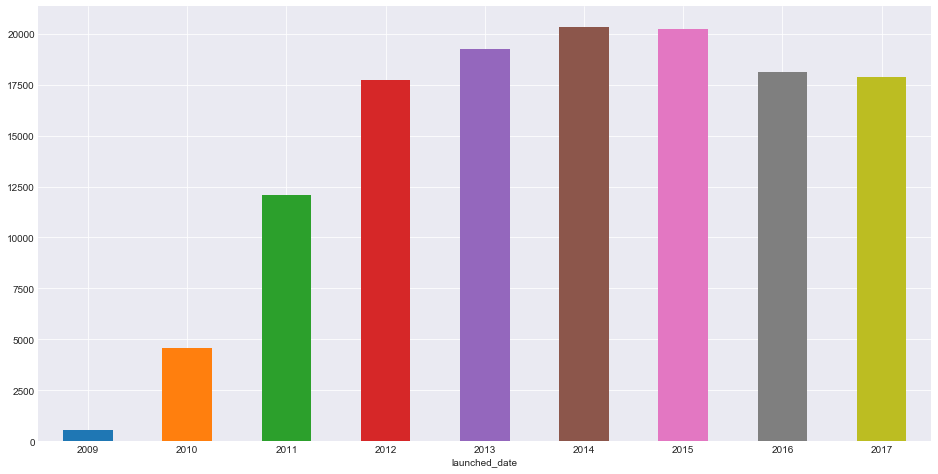

In [45]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

kickstarted.resample('Y')['ID'].count().plot(kind='bar', figsize=(16,8))
plt.xticks(np.arange(9), years, rotation=0)
plt.show()

### Project Window by Weeks




The difference in time between deadline and launch date

In [46]:
projects["funding_window_days"] = (projects['deadline_date'] - projects['launched_date']).apply(lambda x: x.days)
projects["funding_window_weeks"] = (projects['deadline_date'] - projects['launched_date']).apply(lambda x: (int(x.days / 7)))

Text(0.5,0,'Number of Funding Window Weeks')

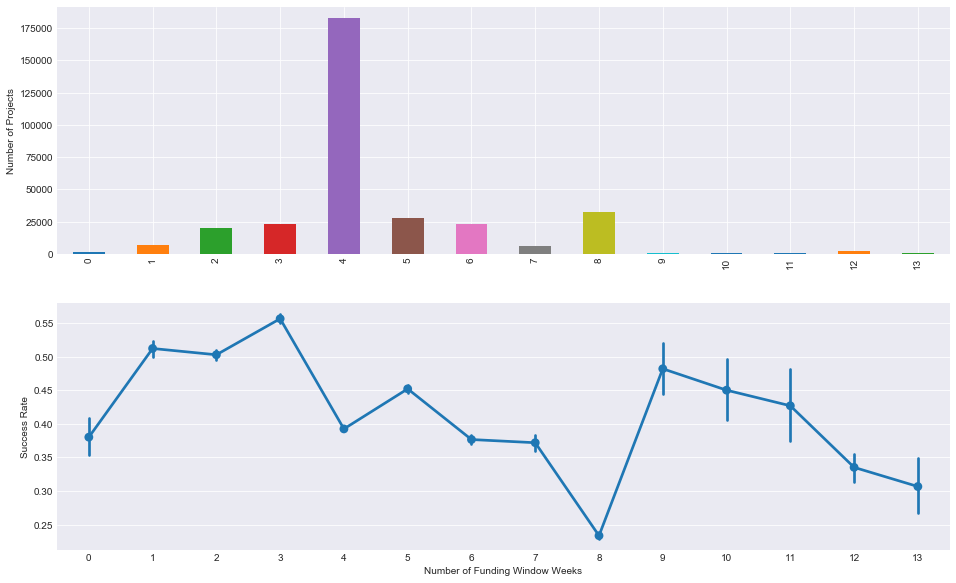

In [47]:
plt.subplots(2,1, figsize=(16,10))

plt.subplot(2,1,1)
projects["funding_window_weeks"].value_counts(sort=False).plot('bar')
plt.ylabel("Number of Projects")

plt.subplot(2,1,2)
sns.pointplot("funding_window_weeks", "result", data=projects)
plt.ylabel("Success Rate")
plt.xlabel("Number of Funding Window Weeks")

### Distribution of Funding Window Days

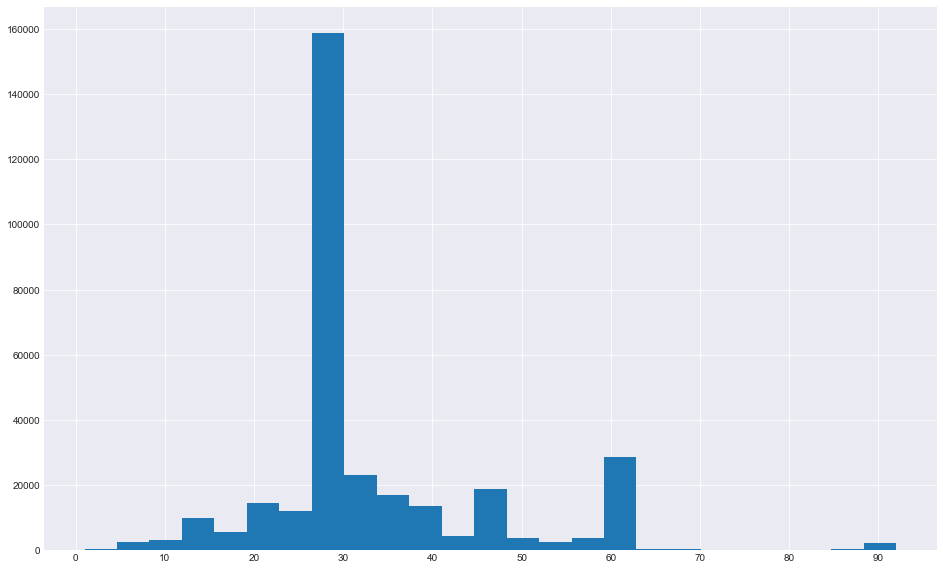

In [48]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))
projects['funding_window_days'].hist(bins=25)
plt.xticks(np.arange(0, 100, step=10))
plt.show()

### Pledged vs. Window

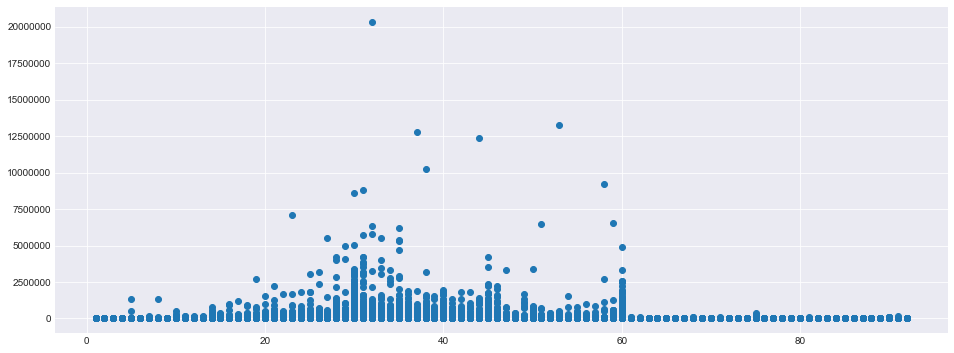

In [49]:
plt.figure(figsize=(16,6))
plt.scatter('funding_window_days', 'usd_pledged_real', data=projects)
plt.ticklabel_format(style='plain', axis='y')

### Project Goal vs. Window

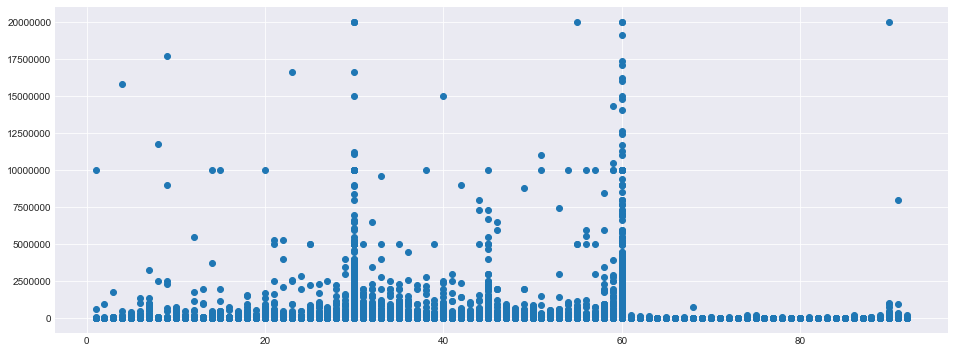

In [50]:
plt.figure(figsize=(16,6))
plt.scatter('funding_window_days', 'usd_goal_real', data=projects)
plt.ticklabel_format(style='plain')

### USD Pledged by Year

Text(0.5,1,'USD Pledged per Year')

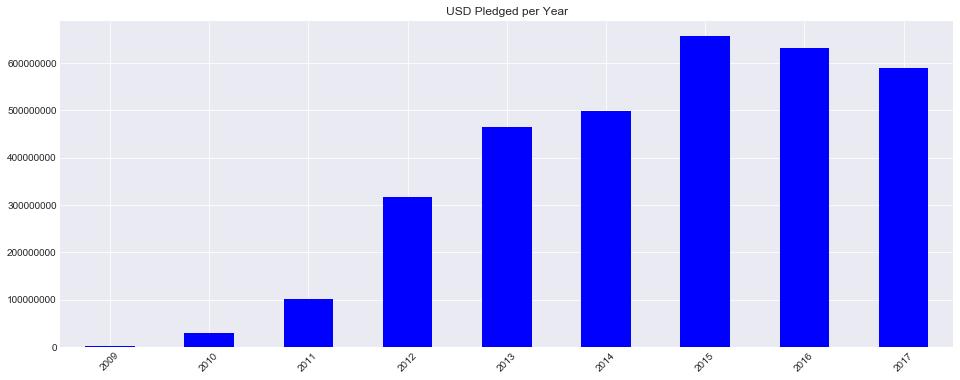

In [51]:
plt.figure(figsize=(16,6))
projects.groupby(lambda x: x.year)['usd_pledged_real'].sum().plot('bar', color='b')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.title("USD Pledged per Year")

In [52]:
projects.resample('Y')['usd_pledged_real'].sum().astype(str)


launched_date
2009-12-31            2796062.82
2010-12-31    29098314.740000013
2011-12-31    102154785.05999948
2012-12-31    317251545.57000065
2013-12-31     464601185.3100023
2014-12-31    498734323.92000085
2015-12-31      655752270.869999
2016-12-31     632003153.8499995
2017-12-31     588244059.0699991
Freq: A-DEC, Name: usd_pledged_real, dtype: object

Text(0.5,1,'# of Projects per Year')

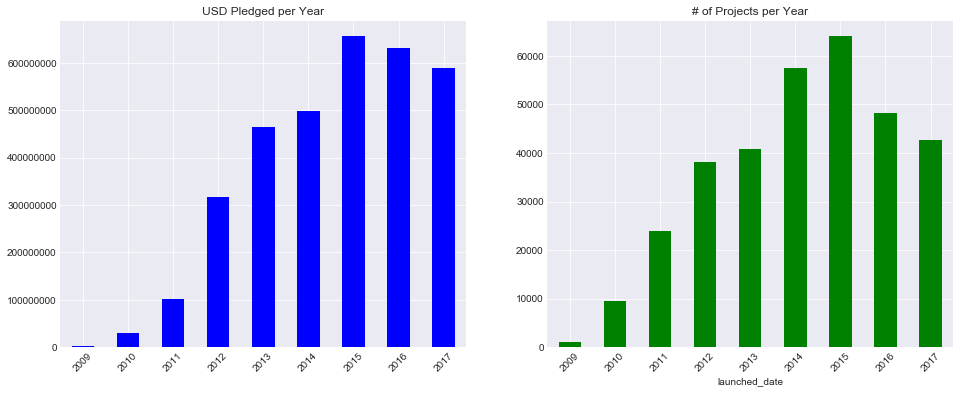

In [53]:
plt.subplots(1, 2, figsize=(16,6))

plt.subplot(1,2,1)
projects.groupby(lambda x: x.year)['usd_pledged_real'].sum().plot('bar', color='b')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.title("USD Pledged per Year")

plt.subplot(1,2,2)
projects_by_year = projects.resample('Y')['ID'].count().plot(kind='bar', color='g')
plt.xticks(np.arange(9), years, rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.title("# of Projects per Year")


## CATEGORY ANALYSIS

In [54]:
successful_cat = projects[projects['state'] == 'successful']
successful_oftotal = successful_cat.groupby('main_category').size()/326112
successful_oftotal

main_category
Art             0.033660
Comics          0.017279
Crafts          0.005903
Dance           0.007142
Design          0.031793
Fashion         0.016789
Film & Video    0.071393
Food            0.017706
Games           0.037125
Journalism      0.002981
Music           0.073067
Photography     0.009810
Publishing      0.036944
Technology      0.019322
Theater         0.019923
dtype: float64

In [55]:
failed_cat = projects[projects['state'] == 'failed']
failed_oftotal = failed_cat.groupby('main_category').size()/326112
failed_oftotal

main_category
Art             0.042271
Comics          0.012293
Crafts          0.017151
Dance           0.003763
Design          0.045199
Fashion         0.043181
Film & Video    0.100236
Food            0.046984
Games           0.048667
Journalism      0.009460
Music           0.066079
Photography     0.019322
Publishing      0.070301
Technology      0.062938
Theater         0.011321
dtype: float64

Text(0,0.5,'Counts')

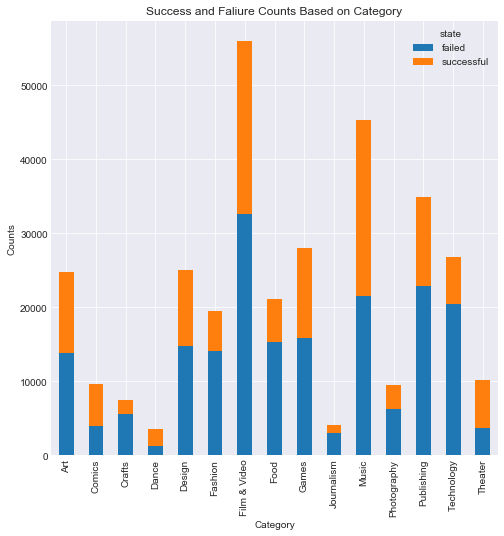

In [56]:
projects.groupby(['main_category', 'state']).size().unstack().plot(kind='bar', stacked=True, figsize=(8,8), title="Success and Faliure Counts Based on Category")
plt.xlabel('Category')
plt.ylabel('Counts')

In [57]:
total = successful_cat.groupby('main_category').size() + failed_cat.groupby('main_category').size()
suc_freq = successful_cat.groupby('main_category').size()/total
fai_freq = failed_cat.groupby('main_category').size()/total
total_df = pd.DataFrame([suc_freq, fai_freq], index=['Successful', 'Failed'])
total_df

# Note, this represents what percent of kickstarters failed and succeeded within each category. 
#i.e of all art kickstarters (that succeeded or failed), 55.7% were successful and 44.3% failed.

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Successful,0.4433,0.584301,0.256052,0.654949,0.412936,0.279951,0.415973,0.273701,0.432733,0.239586,0.525112,0.336737,0.344484,0.234884,0.637648
Failed,0.5567,0.415699,0.743948,0.345051,0.587064,0.720049,0.584027,0.726299,0.567267,0.760414,0.474888,0.663263,0.655516,0.765116,0.362352


In [58]:
total = successful_cat.groupby('category').size() + failed_cat.groupby('category').size()
suc_freq = successful_cat.groupby('category').size()/total
fai_freq = failed_cat.groupby('category').size()/total
total_df = pd.DataFrame([suc_freq, fai_freq], index=['Successful', 'Failed'])
total_df

category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
Successful,0.423009,0.232589,0.388479,0.161184,0.260664,0.304845,0.70442,0.225939,0.068229,0.27874,...,0.398543,0.3375,0.097285,0.596252,0.326874,0.266667,0.333333,0.474339,0.240343,0.498559
Failed,0.576991,0.767411,0.611521,0.838816,0.739336,0.695155,0.29558,0.774061,0.931771,0.72126,...,0.601457,0.6625,0.902715,0.403748,0.673126,0.733333,0.666667,0.525661,0.759657,0.501441


In [59]:
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(50,50))

#art = projects[projects['main_category'] =='Art'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0,0])
#comics = projects[projects['main_category'] =='Comics'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0,1])
#crafts = projects[projects['main_category'] =='Crafts'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0,2])
#dance = projects[projects['main_category'] =='Dance'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1,0])
#design = projects[projects['main_category'] =='Design'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1,1])
#fashion = projects[projects['main_category'] =='Fashion'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1,2])
#film_video = projects[projects['main_category'] =='Film & Video'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2,0])
#food = projects[projects['main_category'] =='Food'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2,1])
#games = projects[projects['main_category'] =='Games'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2,2])
#journalism = projects[projects['main_category'] =='Journalism'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[3,0])
#music = projects[projects['main_category'] =='Music'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[3,1])
#photography = projects[projects['main_category'] =='Photography'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[3,2])
#publishing = projects[projects['main_category'] =='Publishing'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[4,0])
#tech = projects[projects['main_category'] =='Technology'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[4,1])
#theater = projects[projects['main_category'] =='Theater'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[4,2])

#axes[0,0].set_title("Art")
#axes[0,1].set_title("Comics")
#axes[0,2].set_title("Crafts")
#axes[1,0].set_title("Dance")
#axes[1,1].set_title("Design")
#axes[1,2].set_title("Fashion")
#axes[2,0].set_title("Film & Video")
#axes[2,1].set_title("Food")
#axes[2,2].set_title("Games")
#axes[3,0].set_title("Journalism")
#axes[3,1].set_title("Music")
#axes[3,2].set_title("Photography")
#axes[4,0].set_title("Publishing")
#axes[4,1].set_title("Tech")
#axes[4,2].set_title("Theater")

Text(0.5,1,'Dance')

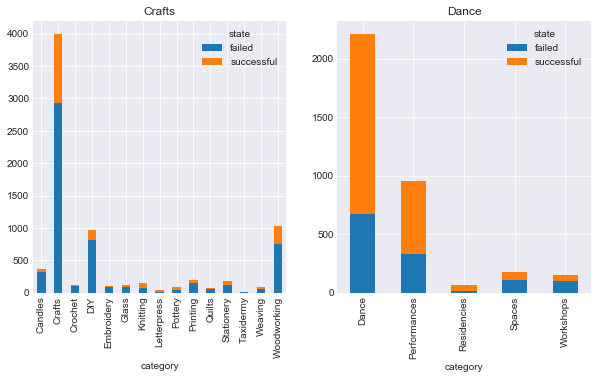

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
crafts = projects[projects['main_category'] =='Crafts'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
dance = projects[projects['main_category'] =='Dance'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Crafts")
axes[1].set_title("Dance")


Text(0.5,1,'Fashion')

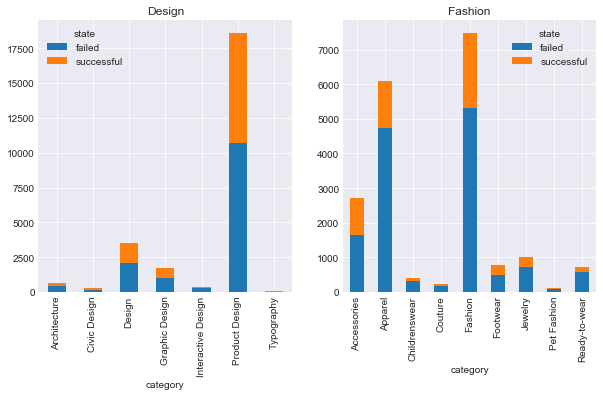

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
design = projects[projects['main_category'] =='Design'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
fashion = projects[projects['main_category'] =='Fashion'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Design")
axes[1].set_title("Fashion")

Text(0.5,1,'Food')

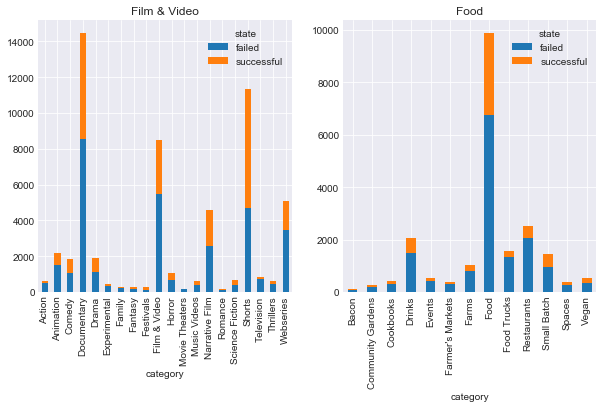

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
film_video = projects[projects['main_category'] =='Film & Video'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
food = projects[projects['main_category'] =='Food'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Film & Video")
axes[1].set_title("Food")

Text(0.5,1,'Journalism')

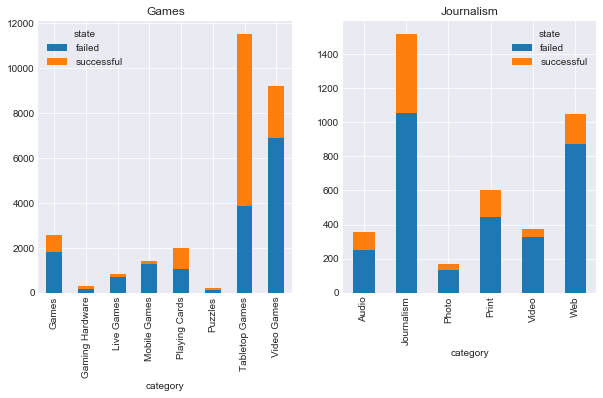

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
games = projects[projects['main_category'] =='Games'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
journalism = projects[projects['main_category'] =='Journalism'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Games")
axes[1].set_title("Journalism")

Text(0.5,1,'Photography')

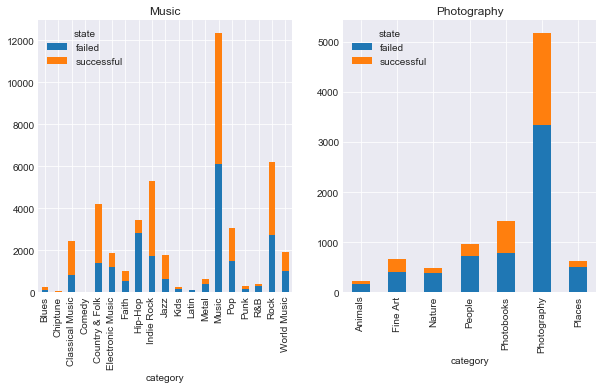

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
music = projects[projects['main_category'] =='Music'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
photography = projects[projects['main_category'] =='Photography'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Music")
axes[1].set_title("Photography")

Text(0.5,1,'Technology')

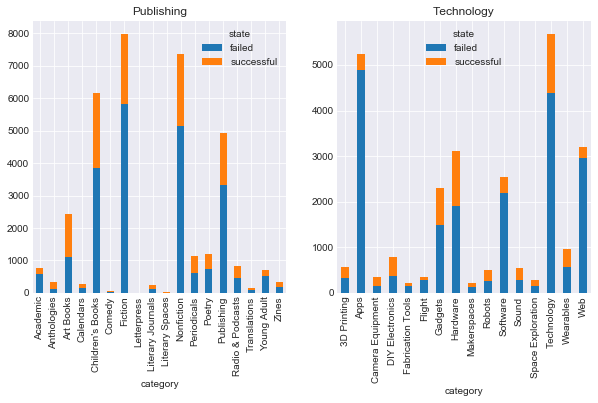

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
publishing = projects[projects['main_category'] =='Publishing'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
technology = projects[projects['main_category'] =='Technology'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Publishing")
axes[1].set_title("Technology")

Text(0.5,1,'Journalism')

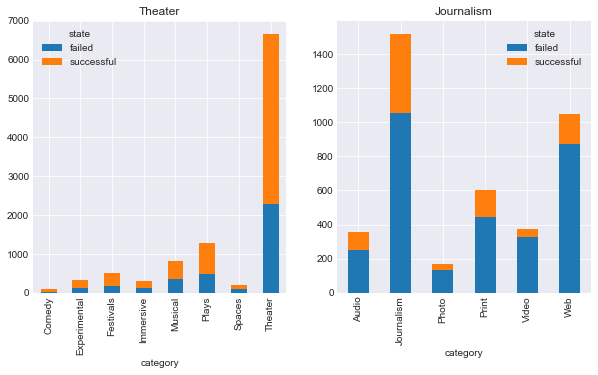

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
theater = projects[projects['main_category'] =='Theater'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
journalism = projects[projects['main_category'] =='Journalism'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Theater")
axes[1].set_title("Journalism")

Text(0.5,1,'Comics')

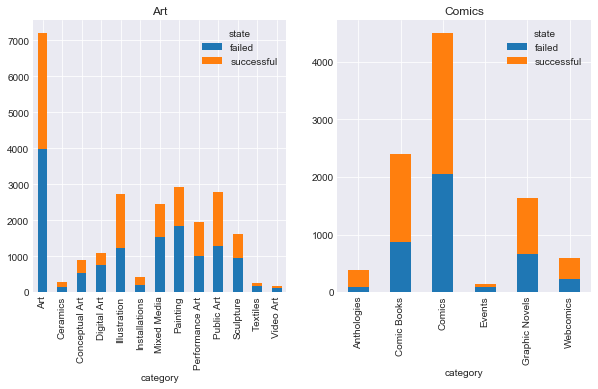

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
art = projects[projects['main_category'] =='Art'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
comics = projects[projects['main_category'] =='Comics'].groupby(['category', 'state']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])

axes[0].set_title("Art")
axes[1].set_title("Comics")

In [68]:
projects['result'] = projects['state'].apply(lambda x: 1 if x == 'successful' else 0)
category2 = projects.groupby(['main_category', 'category'])['result'].mean()
category2['Art']

category
Art                0.448027
Ceramics           0.477941
Conceptual Art     0.385488
Digital Art        0.302947
Illustration       0.549909
Installations      0.537383
Mixed Media        0.369494
Painting           0.367828
Performance Art    0.475528
Public Art         0.539314
Sculpture          0.418819
Textiles           0.299595
Video Art          0.292398
Name: result, dtype: float64

In [69]:
category2['Comics']

category
Anthologies       0.784211
Comic Books       0.637006
Comics            0.541694
Events            0.335821
Graphic Novels    0.593541
Webcomics         0.596252
Name: result, dtype: float64

In [70]:
category2['Crafts']

category
Candles        0.134771
Crafts         0.266700
Crochet        0.122951
DIY            0.157025
Embroidery     0.175258
Glass          0.314050
Knitting       0.522581
Letterpress    0.694444
Pottery        0.494118
Printing       0.239362
Quilts         0.243243
Stationery     0.379888
Taxidermy      0.500000
Weaving        0.337500
Woodworking    0.266667
Name: result, dtype: float64

In [71]:
category2['Dance']

category
Dance           0.695613
Performances    0.650577
Residencies     0.735294
Spaces          0.406780
Workshops       0.333333
Name: result, dtype: float64

In [72]:
category2['Design']

category
Architecture          0.278740
Civic Design          0.393939
Design                0.393644
Graphic Design        0.404553
Interactive Design    0.217523
Product Design        0.424534
Typography            0.638298
Name: result, dtype: float64

In [73]:
category2['Fashion']

category
Accessories      0.388479
Apparel          0.225939
Childrenswear    0.222760
Couture          0.181416
Fashion          0.288850
Footwear         0.381562
Jewelry          0.278431
Pet Fashion      0.283019
Ready-to-wear    0.193724
Name: result, dtype: float64

In [74]:
category2['Film & Video']

category
Action             0.161184
Animation          0.304845
Comedy             0.430969
Documentary        0.406905
Drama              0.424737
Experimental       0.283482
Family             0.224138
Fantasy            0.362069
Festivals          0.509579
Film & Video       0.352011
Horror             0.351351
Movie Theaters     0.265306
Music Videos       0.376013
Narrative Film     0.434053
Romance            0.329114
Science Fiction    0.416667
Shorts             0.585054
Television         0.177363
Thrillers          0.305246
Webseries          0.326874
Name: result, dtype: float64

In [75]:
category2['Food']

category
Bacon                0.189655
Community Gardens    0.237736
Cookbooks            0.274882
Drinks               0.279262
Events               0.170498
Farmer's Markets     0.176471
Farms                0.228019
Food                 0.317518
Food Trucks          0.137931
Restaurants          0.181419
Small Batch          0.339932
Spaces               0.324538
Vegan                0.351248
Name: result, dtype: float64

In [76]:
category2['Games']

category
Games              0.292929
Gaming Hardware    0.326241
Live Games         0.198830
Mobile Games       0.097232
Playing Cards      0.475468
Puzzles            0.424870
Tabletop Games     0.664117
Video Games        0.249428
Name: result, dtype: float64

In [77]:
category2['Journalism']

category
Audio         0.293785
Journalism    0.304548
Photo         0.180723
Print         0.255000
Video         0.130667
Web           0.166507
Name: result, dtype: float64

In [78]:
category2['Music']

category
Blues               0.502146
Chiptune            0.843750
Classical Music     0.674649
Comedy              0.466667
Country & Folk      0.667700
Electronic Music    0.363490
Faith               0.449900
Hip-Hop             0.172414
Indie Rock          0.678619
Jazz                0.631246
Kids                0.482213
Latin               0.302521
Metal               0.424051
Music               0.506045
Pop                 0.509403
Punk                0.539623
R&B                 0.260000
Rock                0.558297
World Music         0.474339
Name: result, dtype: float64

In [79]:
category2['Photography']

category
Animals        0.260664
Fine Art       0.393241
Nature         0.195426
People         0.236593
Photobooks     0.443029
Photography    0.354589
Places         0.174757
Name: result, dtype: float64

In [80]:
category2['Publishing']

category
Academic             0.232589
Anthologies          0.616279
Art Books            0.547648
Calendars            0.439716
Children's Books     0.376259
Comedy               0.369231
Fiction              0.270745
Letterpress          0.600000
Literary Journals    0.534413
Literary Spaces      0.666667
Nonfiction           0.300462
Periodicals          0.445815
Poetry               0.381939
Publishing           0.324095
Radio & Podcasts     0.464115
Translations         0.255474
Young Adult          0.240343
Zines                0.498559
Name: result, dtype: float64

In [81]:
category2['Technology']

category
3D Printing          0.423009
Apps                 0.068229
Camera Equipment     0.547278
DIY Electronics      0.521019
Fabrication Tools    0.303738
Flight               0.209169
Gadgets              0.353247
Hardware             0.385235
Makerspaces          0.367150
Robots               0.455285
Software             0.140282
Sound                0.496364
Space Exploration    0.418773
Technology           0.226744
Wearables            0.398543
Web                  0.074608
Name: result, dtype: float64

In [82]:
category2['Theater']

category
Comedy          0.663043
Experimental    0.623881
Festivals       0.632411
Immersive       0.569492
Musical         0.554745
Plays           0.621495
Spaces          0.510309
Theater         0.658460
Name: result, dtype: float64

In [83]:
category = projects.groupby(['main_category', 'category', 'state']).size()
category

main_category  category           state     
Art            Art                failed        3972
                                  successful    3224
               Ceramics           failed         142
                                  successful     130
               Conceptual Art     failed         542
                                  successful     340
               Digital Art        failed         757
                                  successful     329
               Illustration       failed        1231
                                  successful    1504
               Installations      failed         198
                                  successful     230
               Mixed Media        failed        1546
                                  successful     906
               Painting           failed        1851
                                  successful    1077
               Performance Art    failed        1018
                                  successful     923
 

## BACKERS ANALYSIS

### Average Contribution per Backer

In [84]:
# First, calculating the average contribution
contrib_av = pd.DataFrame(projects['usd_pledged_real']/projects['backers'], columns=['contribution_av'])
pd.value_counts(contrib_av['contribution_av'] == np.inf)
# found later that it contains 'inf' obesrvations ...

False    326109
True          3
Name: contribution_av, dtype: int64

In [85]:
dset_temp = pd.concat([projects, contrib_av], axis=1)
# need to make it avoid inf in calculation of mean
dset = dset_temp.replace([np.inf, -np.inf], np.nan)
dset['contribution_av'][:5]

launched_date
2015-08-11           NaN
2017-09-02    161.400000
2013-01-12     73.333333
2012-03-17      1.000000
2016-02-26    233.816964
Name: contribution_av, dtype: float64

In [86]:
pd.value_counts(dset['contribution_av'] == np.inf)
# checking if any inf left; nas are avoided in calcualtions

False    326112
Name: contribution_av, dtype: int64

#### Average Contribution Overall

In [87]:
contribution_average_all = dset['contribution_av'].mean()
contribution_med_all = dset['contribution_av'].median()
round(contribution_average_all,2), round(contribution_med_all, 2)

(75.59, 49.61)

#### Average Contribution by Project State



In [88]:
grouped_con_s = dset['contribution_av'].groupby(dset['state'])
grouped_con_s.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
failed,157896.0,61.463156,145.531561,0.450000,16.558000,35.000000,65.904762,10000.0
successful,130717.0,92.644650,126.477225,2.038462,42.272727,64.354167,103.605000,10000.0


#### Average Contribution by Main Category

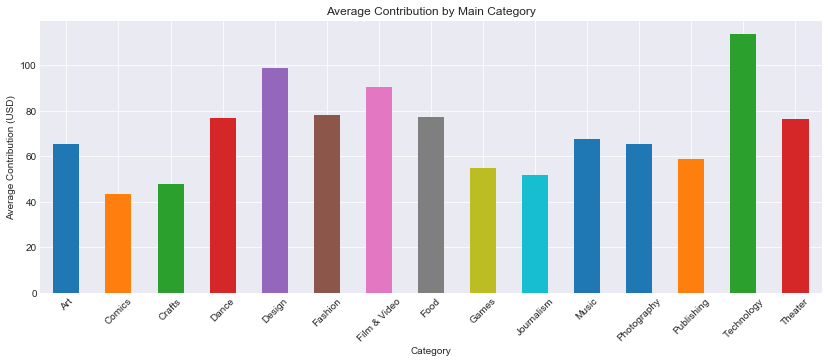

In [89]:
grouped_con_mcat = dset['contribution_av'].groupby(dset['main_category']).mean()
#grouped_con_mcat.describe()
plt.figure(figsize=(14,5))
grouped_con_mcat.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Average Contribution by Main Category")
plt.ylabel("Average Contribution (USD)")
plt.xlabel("Category")
plt.show()

#### Average Contribution by Sub-Category

chart below in the no of backers part

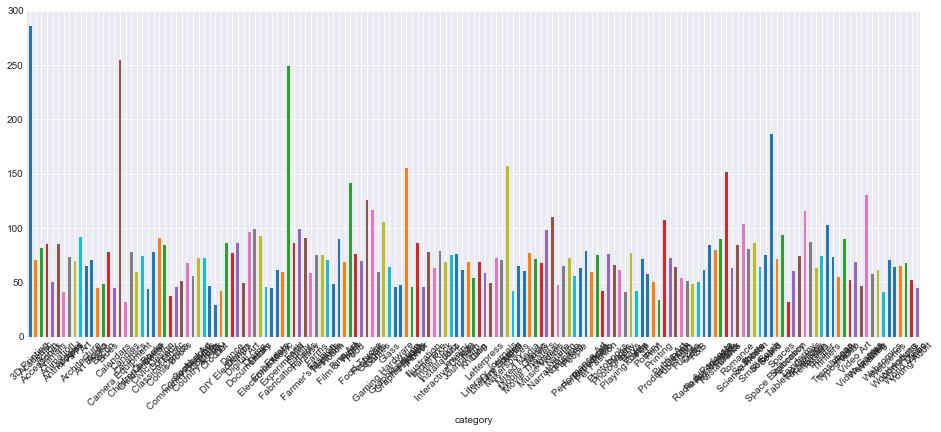

In [90]:
# Average contribution also by each category
grouped_con_cat = dset['contribution_av'].groupby(dset['category']).mean()
plt.figure(figsize=(16,6))
grouped_con_cat.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# We can pass on this one lol

#### Average Contribution by Country

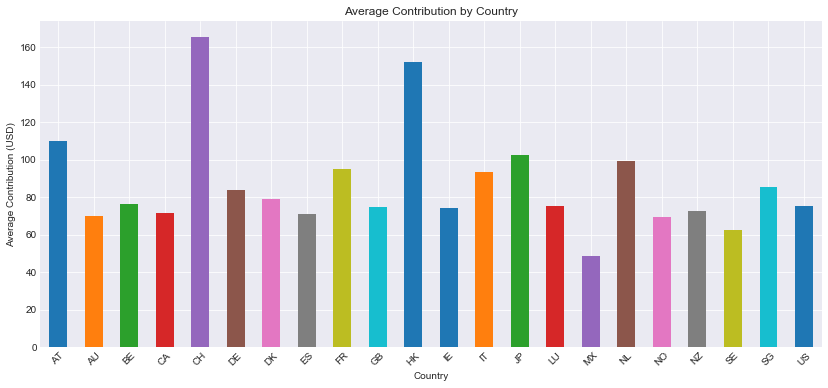

In [91]:
grouped_con_country = dset['contribution_av'].groupby(dset['country']).mean()
grouped_con_country
plt.figure(figsize=(14,6))
grouped_con_country.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Average Contribution by Country")
plt.ylabel("Average Contribution (USD)")
plt.xlabel("Country")
plt.show()

#### Average contribution: by Country & Main Category

In [92]:
grouped_con_country_mcat = dset.groupby(['country', 'main_category'])['contribution_av'].mean().unstack()
grouped_con_country_mcat

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
country,,,,,,,,,,,,,,,
AT,67.636368,65.937989,78.361619,63.828095,165.914293,97.578129,87.932994,92.989985,52.855569,8.660278,65.740316,91.486645,46.669132,185.916294,56.633172
AU,78.464280,32.709634,34.189511,76.536981,88.628165,77.820395,84.515073,59.721324,39.098244,47.357268,62.589326,51.513816,54.013023,95.835956,110.755159
BE,68.349117,28.797481,43.907074,37.738333,151.084018,87.716296,75.049790,55.686310,57.294937,15.450833,78.352348,73.502025,52.718708,72.304439,49.689676
CA,58.188256,39.742855,46.761884,73.601631,104.726265,82.947071,83.429017,68.104544,45.002313,37.337779,60.277468,63.796885,51.629747,109.213213,59.722612
CH,101.148519,62.350057,157.362421,79.727500,361.563162,164.612575,94.919214,126.618192,50.354945,22.103500,82.149623,71.732962,66.293816,157.623503,188.954344
DE,83.903907,32.337741,50.789948,57.099496,122.591346,94.702010,75.517663,55.559357,46.812129,32.689055,54.050639,59.947593,56.966419,127.029403,52.315219
DK,61.844051,31.581271,68.958169,64.954385,136.099805,125.667308,62.860553,63.053893,55.227095,41.362737,44.387317,35.616660,48.713974,92.321764,49.339183
ES,49.357671,36.827828,124.948252,33.762333,84.082118,79.585625,67.389068,48.485092,53.101786,32.044868,60.039766,65.394281,61.029196,109.866186,111.250254
FR,66.498554,49.317674,60.199321,61.289482,151.089231,127.541448,78.232664,61.379476,56.346093,70.294459,64.838873,67.032411,59.534045,139.778556,54.069391


In [93]:
grouped_con_country_mcat = dset.groupby(['country', 'main_category'])['contribution_av'].count().unstack()
grouped_con_country_mcat
# also gives the picture which projects people tend to invest in, depending on the country 
# would be great to do it in % terms relative to total by countries

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
country,,,,,,,,,,,,,,,
AT,22.0,6.0,7.0,3.0,58.0,25.0,38.0,31.0,45.0,4.0,24.0,24.0,32.0,89.0,3.0
AU,309.0,158.0,132.0,26.0,715.0,493.0,659.0,290.0,676.0,62.0,340.0,199.0,645.0,792.0,54.0
BE,35.0,7.0,13.0,1.0,56.0,41.0,25.0,28.0,74.0,6.0,37.0,19.0,33.0,73.0,4.0
CA,727.0,453.0,269.0,73.0,1097.0,711.0,1183.0,648.0,1324.0,140.0,852.0,268.0,1070.0,1273.0,161.0
CH,36.0,6.0,16.0,2.0,109.0,47.0,34.0,29.0,53.0,4.0,38.0,11.0,26.0,136.0,3.0
DE,152.0,43.0,68.0,17.0,436.0,199.0,226.0,142.0,437.0,42.0,195.0,140.0,182.0,581.0,26.0
DK,54.0,10.0,22.0,3.0,136.0,57.0,82.0,42.0,72.0,17.0,75.0,20.0,58.0,118.0,16.0
ES,103.0,26.0,24.0,5.0,153.0,133.0,117.0,61.0,357.0,26.0,93.0,36.0,110.0,260.0,8.0
FR,131.0,27.0,51.0,12.0,261.0,188.0,201.0,88.0,374.0,18.0,130.0,74.0,133.0,437.0,12.0


#### Average Contribution over Time

In [94]:
dset.resample('Y').mean()['contribution_av']

launched_date
2009-12-31    65.016265
2010-12-31    72.732145
2011-12-31    72.625024
2012-12-31    71.786052
2013-12-31    76.582132
2014-12-31    73.106095
2015-12-31    78.114282
2016-12-31    76.334697
2017-12-31    79.622260
Freq: A-DEC, Name: contribution_av, dtype: float64

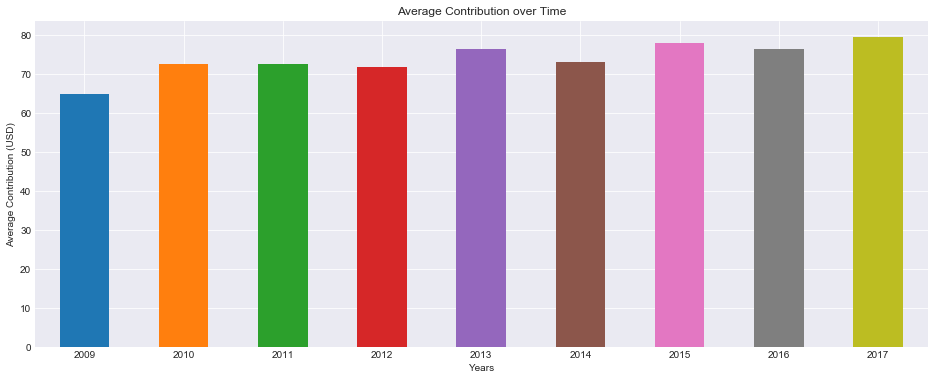

In [95]:
plt.figure(figsize=(16,6))
dset.resample('Y').mean()['contribution_av'].plot(kind='bar')
plt.xticks(np.arange(9), years, rotation=0)
plt.title("Average Contribution over Time")
plt.ylabel("Average Contribution (USD)")
plt.xlabel("Years")
plt.show()
# growing overall, but not significantly

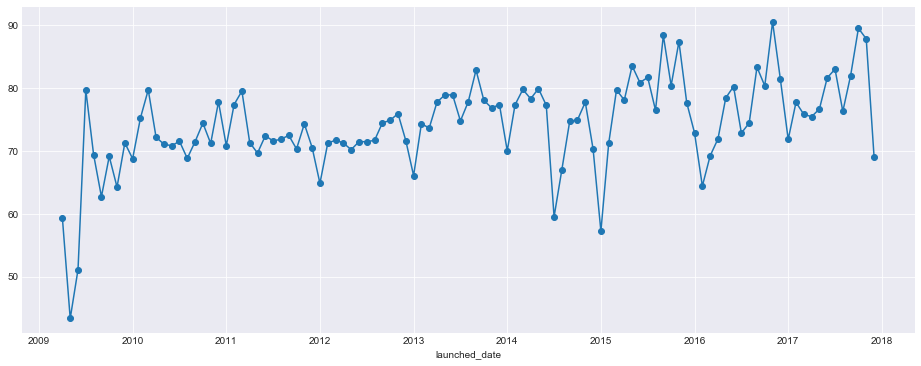

In [96]:
plt.figure(figsize=(16,6))
dset.resample('M').mean()['contribution_av'].plot(marker='o')

#### Average Contribution over Time by Category

In [97]:
# splitting into categories (assume there exists a better way to plot it...)
# below are few graphs, checked all - nothing insightful

art = dset.loc[dset['main_category'] == 'Art']
art_plot = art.resample('M').mean()['contribution_av']

comics = dset.loc[dset['main_category'] == 'Comics']
comics_plot = art.resample('M').mean()['contribution_av']

crafts = dset.loc[dset['main_category'] == 'Crafts']
crafts_plot = art.resample('M').mean()['contribution_av']

dance = dset.loc[dset['main_category'] == 'Dance']
dance_plot = art.resample('M').mean()['contribution_av']

design = dset.loc[dset['main_category'] == 'Design']
design_plot = art.resample('M').mean()['contribution_av']

fashion = dset.loc[dset['main_category'] == 'Fashion']
fashion_plot = art.resample('M').mean()['contribution_av']

fv = dset.loc[dset['main_category'] == 'Film & Video']
fv_plot = art.resample('M').mean()['contribution_av']

food = dset.loc[dset['main_category'] == 'Food']
food_plot = art.resample('M').mean()['contribution_av']

games = dset.loc[dset['main_category'] == 'Games']
games_plot = art.resample('M').mean()['contribution_av']

jour = dset.loc[dset['main_category'] == 'Journalism']
jour_plot = art.resample('M').mean()['contribution_av']

music = dset.loc[dset['main_category'] == 'Music']
music_plot = art.resample('M').mean()['contribution_av']

photo = dset.loc[dset['main_category'] == 'Photography']
photo_plot = art.resample('M').mean()['contribution_av']

publish = dset.loc[dset['main_category'] == 'Publishing']
publish_plot = art.resample('M').mean()['contribution_av']

tech = dset.loc[dset['main_category'] == 'Technology']
tech_plot = art.resample('M').mean()['contribution_av']

theater = dset.loc[dset['main_category'] == 'Theater']
theater_plot = art.resample('M').mean()['contribution_av']

Text(0,0.5,'Average contribution')

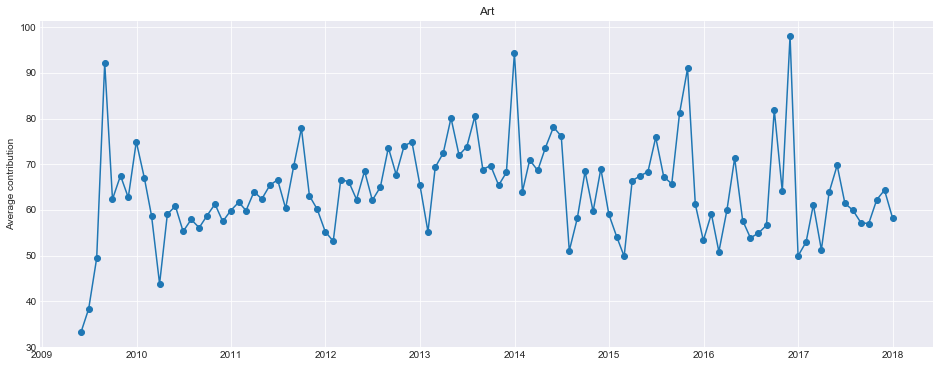

In [98]:
plt.figure(figsize=(16,6))
plt.plot(art_plot, marker='o')
plt.title('Art')
plt.ylabel('Average contribution')

Text(0,0.5,'Average contribution')

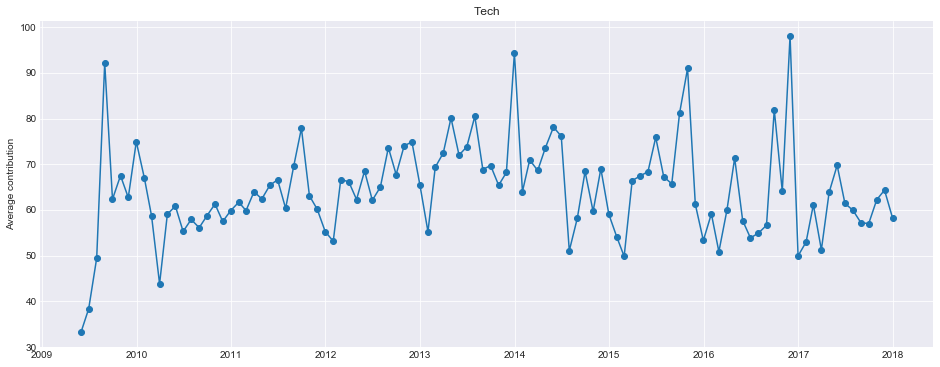

In [99]:
plt.figure(figsize=(16,6))
plt.plot(tech_plot, marker='o')
plt.title('Tech')
plt.ylabel('Average contribution')

Text(0,0.5,'Average contribution')

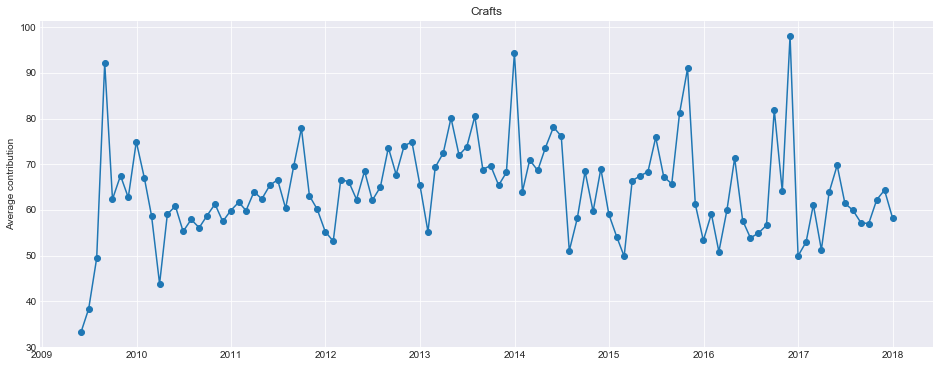

In [100]:
plt.figure(figsize=(16,6))
plt.plot(crafts_plot, marker='o')
plt.title('Crafts')
plt.ylabel('Average contribution')

Text(0,0.5,'Average contribution')

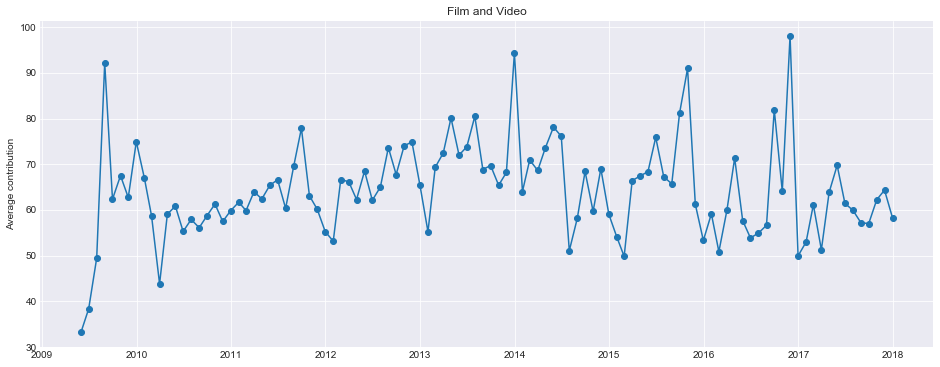

In [101]:
plt.figure(figsize=(16,6))
plt.plot(fv_plot, marker='o')
plt.title('Film and Video')
plt.ylabel('Average contribution')

### Backers

Backers: overall and by state

In [102]:
dset['backers'].mean()

117.97582425669708

In [103]:
grouped_back_s = dset['backers'].groupby(dset['state'])
grouped_back_s.mean()

state
failed         16.592057
successful    269.523681
Name: backers, dtype: float64

#### Average # of Backers vs Average USD Contribution

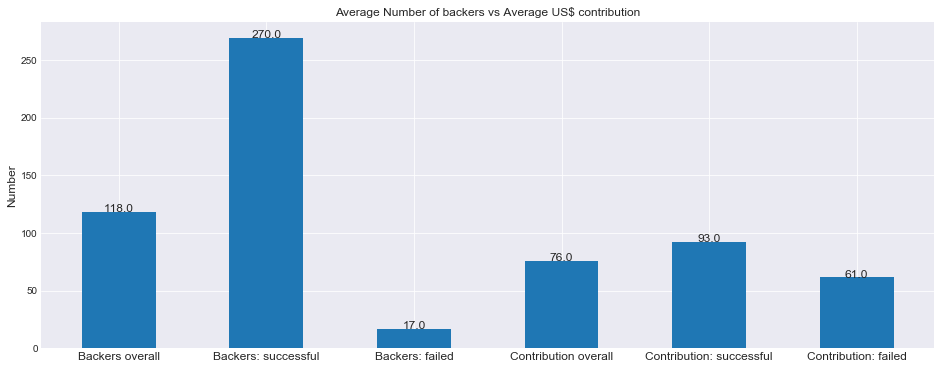

In [104]:
objects2 = ('Backers overall', 'Backers: successful', 'Backers: failed', 'Contribution overall', 'Contribution: successful', 'Contribution: failed')
y_pos2 = np.arange(len(objects2))
values2 = [dset['backers'].mean(), grouped_back_s.mean().successful, grouped_back_s.mean().failed, contribution_average_all, grouped_con_s.mean().successful, 
          grouped_con_s.mean().failed]
plt.figure(figsize=(16,6))
plt.bar(y_pos2, values2, align='center', alpha=1, width = 0.5)
plt.xticks(y_pos2, objects2, size=12)
plt.ylabel('Number', size=12)
plt.title('Average Number of backers vs Average US$ contribution', size=12)

for a, b in zip(y_pos2, values2):
    plt.text(a, b, str(round(b,0)), ha='center', va='baseline', size=12)

**The graph tells that a project's success is more likely to be associated with how many people believe in it vs the size of their contribution**

#### Backers by Main Category 

In [105]:
grouped_back_mcat = dset['backers'].groupby(dset['main_category'])
grouped_back_mcat.describe()

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,24762.0,46.635490,226.790654,0.0,2.0,13.0,43.0,22834.0
Comics,9644.0,148.362090,411.723149,0.0,11.0,47.0,134.0,14952.0
Crafts,7518.0,30.505454,177.855405,0.0,1.0,4.0,19.0,12705.0
Dance,3556.0,44.981159,89.310687,0.0,8.0,29.0,59.0,4133.0
Design,25108.0,276.629202,1673.226295,0.0,7.0,35.0,146.0,154926.0
Fashion,19557.0,69.081403,365.817094,0.0,1.0,6.0,38.0,15129.0
Film & Video,55970.0,73.179971,576.548412,0.0,2.0,15.0,56.0,91585.0
Food,21096.0,61.055413,272.680332,0.0,2.0,8.0,51.0,13116.0
Games,27978.0,388.072450,2409.926013,0.0,6.0,41.0,211.0,219382.0


In [106]:
grouped_con_mcat.describe()

count     15.000000
mean      71.090099
std       19.447832
min       43.534967
25%       56.849774
50%       67.593206
75%       77.529527
max      113.859336
Name: contribution_av, dtype: float64

#### Backers by country and main category 

In [107]:
grouped_back_country = dset['backers'].groupby(dset['country'])
grouped_back_country.describe()
# on average:

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AT,480.0,129.862500,1266.680127,0.0,1.0,5.0,38.00,26832.0
AU,6483.0,91.710319,537.544297,0.0,1.0,7.0,46.00,20787.0
BE,514.0,62.852140,196.890401,0.0,2.0,6.0,39.50,2679.0
CA,12029.0,101.945299,788.763519,0.0,1.0,10.0,52.00,70122.0
CH,646.0,99.213622,433.978895,0.0,1.0,7.0,45.00,6514.0
DE,3406.0,112.854375,534.376152,0.0,1.0,8.0,45.00,12412.0
DK,904.0,78.276549,228.087889,0.0,2.0,12.0,51.50,2749.0
ES,1846.0,82.160888,364.932487,0.0,1.0,5.0,42.00,9086.0
FR,2493.0,131.629362,564.139900,0.0,2.0,12.0,71.00,12103.0


In [108]:
total_b = grouped_back_country.sum()
total_b
# grouped_back_country.sum().plot(kind='bar')
# total:

country
AT       62334
AU      594558
BE       32306
CA     1226300
CH       64092
DE      384382
DK       70762
ES      151669
FR      328152
GB     2722535
HK       73359
IE       44353
IT      134227
JP        1009
LU        3032
MX       38630
NL      219925
NO       24559
NZ       99324
SE      158887
SG       65594
US    31973343
Name: backers, dtype: int64

In [109]:
total_b_share = (( grouped_back_country.sum()) / (dset['backers'].sum()) ) * 100
total_b_share
# 83% are from US. But interesting to compare vs country size

country
AT     0.162019
AU     1.545377
BE     0.083970
CA     3.187403
CH     0.166588
DE     0.999087
DK     0.183925
ES     0.394219
FR     0.852934
GB     7.076421
HK     0.190675
IE     0.115282
IT     0.348883
JP     0.002623
LU     0.007881
MX     0.100407
NL     0.571630
NO     0.063834
NZ     0.258163
SE     0.412980
SG     0.170492
US    83.105209
Name: backers, dtype: float64

In [110]:
grouped_back_country_mcat = dset.groupby(['country', 'main_category'])['backers'].sum().unstack()
grouped_back_country_mcat

# total no of backers by category and country

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
country,,,,,,,,,,,,,,,
AT,1307.0,603.0,77.0,74.0,32853.0,2191.0,1043.0,546.0,9034.0,29.0,686.0,870.0,1642.0,11311.0,68.0
AU,13017.0,13356.0,2538.0,569.0,177727.0,22760.0,48973.0,7859.0,143796.0,1706.0,12826.0,9531.0,52373.0,86183.0,1344.0
BE,1627.0,166.0,96.0,6.0,4772.0,1281.0,639.0,1233.0,8385.0,10.0,4210.0,379.0,4805.0,4638.0,59.0
CA,32880.0,66817.0,5806.0,1777.0,258627.0,51321.0,86828.0,27099.0,357888.0,7254.0,37780.0,9407.0,66636.0,210571.0,5609.0
CH,832.0,205.0,420.0,5.0,23934.0,4268.0,786.0,1375.0,10297.0,10.0,686.0,230.0,733.0,20216.0,95.0
DE,8539.0,5000.0,2328.0,252.0,82825.0,17268.0,25606.0,11289.0,120698.0,655.0,9122.0,7224.0,14068.0,78721.0,787.0
DK,3507.0,562.0,720.0,249.0,19805.0,6301.0,2275.0,1535.0,10900.0,3300.0,2735.0,809.0,4358.0,12918.0,788.0
ES,6873.0,2916.0,225.0,8.0,13440.0,16900.0,8114.0,1354.0,70799.0,308.0,3581.0,1721.0,11322.0,13839.0,269.0
FR,6979.0,6898.0,2202.0,506.0,76426.0,9426.0,16694.0,4623.0,128296.0,778.0,6831.0,4268.0,18210.0,45729.0,286.0


In [111]:
grouped_back_country_mcat = dset.groupby(['country', 'main_category'])['backers'].mean().unstack()
grouped_back_country_mcat

# mean no of backers by category and country

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
country,,,,,,,,,,,,,,,
AT,46.678571,100.500000,8.555556,24.666667,513.328125,73.033333,22.673913,15.166667,184.367347,3.625000,21.437500,33.461538,45.611111,110.892157,13.600000
AU,35.468665,82.956522,16.588235,20.321429,236.339096,38.839590,60.311576,21.709945,196.711354,18.344086,31.282927,38.277108,71.255782,87.852192,21.333333
BE,41.717949,23.714286,5.333333,6.000000,78.229508,27.255319,17.270270,41.100000,104.812500,1.250000,89.574468,18.047619,137.285714,58.708861,14.750000
CA,36.737430,143.077088,17.487952,21.670732,223.339378,58.921929,59.268259,33.579926,255.451820,40.300000,37.258383,28.506061,50.673764,137.179805,31.689266
CH,19.348837,34.166667,22.105263,1.666667,209.947368,76.214286,18.279070,32.738095,174.525424,2.500000,15.590909,19.166667,22.212121,124.024540,19.000000
DE,45.908602,116.279070,29.100000,12.600000,180.446623,74.753247,93.794872,59.104712,257.351812,10.076923,35.494163,41.045455,60.119658,113.594517,27.137931
DK,55.666667,51.090909,28.800000,83.000000,137.534722,92.661765,23.453608,32.659574,137.974684,173.684211,32.559524,38.523810,60.527778,84.986842,41.473684
ES,56.801653,94.064516,7.258065,1.333333,80.479042,101.807229,55.197279,14.559140,186.804749,8.324324,28.879032,37.413043,77.020408,40.346939,33.625000
FR,47.155405,237.862069,32.382353,31.625000,277.912727,43.238532,69.558333,38.848739,318.352357,29.923077,41.150602,50.211765,119.019608,85.634831,22.000000


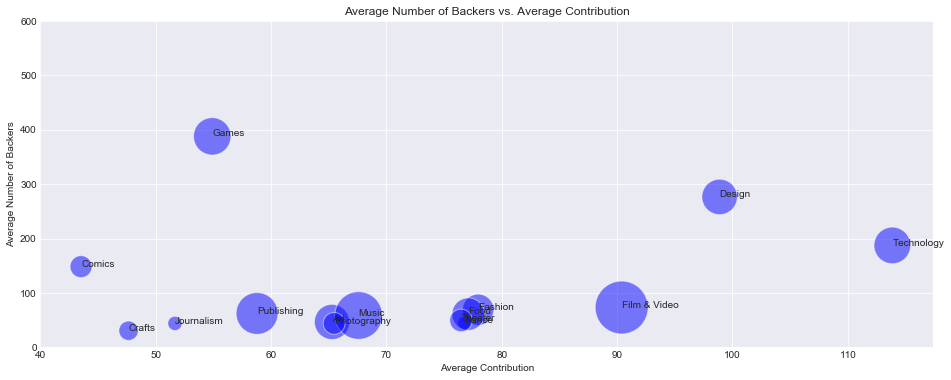

In [112]:
x = grouped_con_mcat
y = grouped_back_mcat.mean()
size = grouped_back_mcat.count()

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x, y, s=size/20, color='blue', alpha=0.5, edgecolors='white', label='Av contribution vs Av no of backers')
plt.title("Average Number of Backers vs. Average Contribution")
plt.xlabel('Average Contribution')
plt.ylabel('Average Number of Backers')
plt.ylim(0,  600)

n = ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music',  'Photography', 'Publishing', 'Technology', 'Theater']
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
    # yet to find how to make it look nice...

#### # of Backers on Average over Time

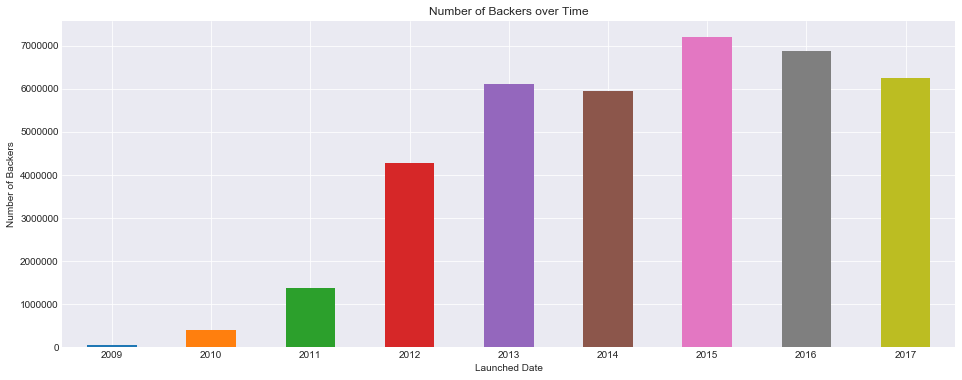

In [113]:
plt.figure(figsize=(16,6))
dset.resample('Y').sum()['backers'].plot(kind='bar')
dset.resample('Y').sum()['backers']
plt.xticks(np.arange(9), years, rotation=0)
plt.title("Number of Backers over Time")
plt.ylabel("Number of Backers")
plt.xlabel("Launched Date")
plt.show()
# decrease could be attributed to different categories' popularity

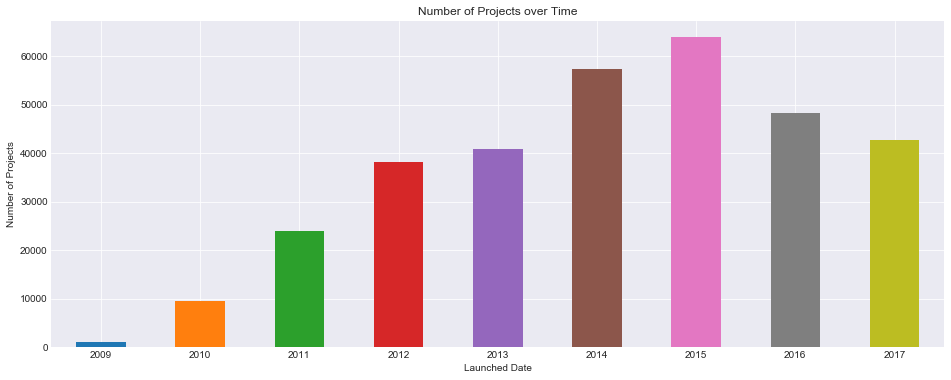

In [114]:
plt.figure(figsize=(16,6))
dset.resample('Y').count()['ID'].plot(kind='bar')
dset.resample('Y').count()['ID']
plt.xticks(np.arange(9), years, rotation=0)
plt.title("Number of Projects over Time")
plt.ylabel("Number of Projects")
plt.xlabel("Launched Date")
plt.show()
# total projects by year

Text(0.5,0,'Year')

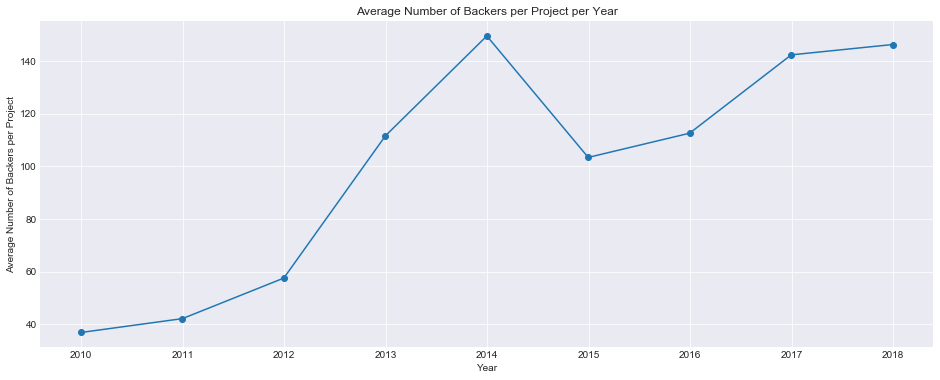

In [115]:
plt.figure(figsize=(16,6))
back_over_proj =  ((dset.resample('Y').sum()['backers'])) / ( dset.resample('Y').count()['ID'] )
plt.plot(back_over_proj, marker='o')
plt.title("Average Number of Backers per Project per Year")
plt.ylabel("Average Number of Backers per Project")
plt.xlabel("Year")
# trying to see no of backers over project per year 
# so actually no of backers per project did not decrease but increased in 2016-2017

In [116]:
from scipy.stats import pearsonr

In [117]:
pearsonr(dset.usd_pledged_real, dset.backers)

(0.7532553794814285, 0.0)

#### Pledged vs Backers

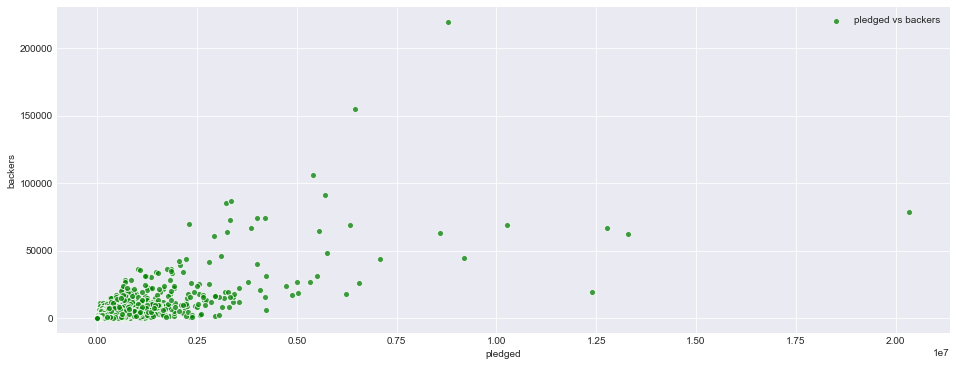

In [118]:
plt.figure(figsize=(16,6))
plt.scatter(dset.usd_pledged_real, dset.backers, color='green', alpha=0.75, 
            edgecolors='white', label='pledged vs backers')
plt.xlabel('pledged')
plt.ylabel('backers')
plt.legend()

# rather obvious but still. a few high value projects with relativelly small number of backers

#### Misc. Analysis

In [119]:
grouped_country_mcat = dset['country'].groupby(dset['main_category'])
grouped_country_mcat.describe()

,count,unique,top,freq
main_category,,,,
Art,24762,22,US,19790
Comics,9644,21,US,7948
Crafts,7518,20,US,5739
Dance,3556,20,US,3069
Design,25108,22,US,18293
Fashion,19557,22,US,14378
Film & Video,55970,21,US,46520
Food,21096,21,US,17314
Games,27978,22,US,19826


In [120]:
grouped_mcat_country = dset['main_category'].groupby(dset['country'])
grouped_mcat_country.describe()

,count,unique,top,freq
country,,,,
AT,480,15,Technology,102
AU,6483,15,Technology,981
BE,514,15,Games,80
CA,12029,15,Technology,1535
CH,646,15,Technology,163
DE,3406,15,Technology,693
DK,904,15,Technology,152
ES,1846,15,Games,379
FR,2493,15,Technology,534


external data
US quarterly GDP

In [121]:
# BEA data on US quarterly changes in GDP
usdata_temp = pd.read_csv('us_gdp_q.csv')
usdata_temp = usdata_temp.set_index(pd.DatetimeIndex(usdata_temp['Quarter']))
usdata = usdata_temp.drop(['Quarter'], axis=1)
usdata

,change
Quarter,
2009-03-31,-5.4
2009-06-30,-0.5
2009-09-30,1.3
2009-12-31,3.9
2010-03-31,1.7
2010-06-30,3.9
2010-09-30,2.7
2010-12-31,2.5
2011-03-31,-1.5


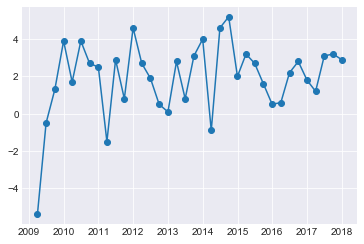

In [122]:
plt.plot(usdata, marker='o')

In [123]:
us_projects = dset.loc[dset['country'] == 'US']
us_projects[:5]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,result,funding_window_days,funding_window_weeks,contribution_av
launched_date,,,,,,,,,,,,,,,,,,,,,
2017-09-02,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.0,2017-09-02,2017-11-01,0,60,8,161.400000
2013-01-12,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.0,2013-01-12,2013-02-26,0,45,6,73.333333
2012-03-17,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.0,2012-03-17,2012-04-16,0,30,4,1.000000
2016-02-26,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,US,52375.0,52375.0,50000.0,2016-02-26,2016-04-01,1,35,5,233.816964
2014-12-01,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,...,US,1205.0,1205.0,1000.0,2014-12-01,2014-12-21,1,20,2,75.312500


In [124]:
usgdp_q_1 = usdata.join(us_projects.resample('Q').sum()['usd_pledged_real'])
usgdp_q_11 = usgdp_q_1.rename(columns={"usd_pledged_real": "usd_pledged"})
usgdp_q_21 = usgdp_q_11.join(us_projects.resample('Q').mean()['usd_pledged_real'])
usgdp_q_22 = usgdp_q_21.rename(columns={"usd_pledged_real": "average_pledged"})
usgdp_q_31 = usgdp_q_22.join(us_projects.resample('Q').sum()['backers'])
usgdp_q_32 = usgdp_q_31.rename(columns={"backers": "total backers"})
usgdp_q_41 = usgdp_q_32.join(us_projects.resample('Q').count()['ID'])
usgdp_q = usgdp_q_41.rename(columns={"ID": "No of projects"})
usgdp_q

,change,usd_pledged,average_pledged,total backers,No of projects
Quarter,,,,,
2009-03-31,-5.4,NaN,NaN,NaN,NaN
2009-06-30,-0.5,2.579038e+05,1790.998403,5078.0,144.0
2009-09-30,1.3,1.147978e+06,2468.770968,16873.0,465.0
2009-12-31,3.9,1.390181e+06,2550.790000,20598.0,545.0
2010-03-31,1.7,3.214514e+06,3084.946315,43208.0,1042.0
2010-06-30,3.9,5.914227e+06,2595.097442,85271.0,2279.0
2010-09-30,2.7,7.850931e+06,2793.925537,108668.0,2810.0
2010-12-31,2.5,1.211864e+07,3575.875730,163980.0,3389.0
2011-03-31,-1.5,1.837001e+07,3708.115864,261593.0,4954.0


In [125]:
usgdp_q.corr(method='pearson')
# literally no correlation between gdp change and key vars

,change,usd_pledged,average_pledged,total backers,No of projects
change,1.000000,0.105488,0.046699,0.107364,0.182125
usd_pledged,0.105488,1.000000,0.890250,0.981095,0.823673
average_pledged,0.046699,0.890250,1.000000,0.845079,0.536892
total backers,0.107364,0.981095,0.845079,1.000000,0.862922
No of projects,0.182125,0.823673,0.536892,0.862922,1.000000


WB annual data on all countries in the sample

In [126]:
# 21
wb_gdp_pc = pd.read_csv('wb_gdp_pc.csv', header=0, parse_dates=[0], index_col=0)
wb_gdp_pc

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,51690.0,46123.0,43591.0,46544.0,57229.0,40052.0,40086.0,30711.0,48072.0,35363.0,...,8712.0,49897.0,33744.0,88260.0,41133.0,30874.0,49554.0,73189.0,38546.0,47576.0
2010-01-01,51937.0,46858.0,44380.0,47447.0,58041.0,40638.0,41786.0,32550.0,48672.0,35849.0,...,9016.0,50338.0,33692.0,87770.0,46570.0,30737.0,52076.0,74606.0,38893.0,48375.0
2011-01-01,52476.0,48065.0,44556.0,48457.0,58576.0,41283.0,44125.0,33888.0,49907.0,35994.0,...,9208.0,50938.0,34337.0,87481.0,48505.0,30322.0,53062.0,75030.0,39151.0,48786.0
2012-01-01,53553.0,48172.0,44338.0,48724.0,58488.0,41159.0,44259.0,34086.0,49714.0,34885.0,...,9406.0,50213.0,35003.0,88689.0,49262.0,29415.0,52520.0,74984.0,39455.0,49498.0
2013-01-01,54009.0,47901.0,44210.0,49359.0,58788.0,41184.0,44355.0,35003.0,50263.0,33887.0,...,9400.0,49970.0,35436.0,88539.0,50948.0,29008.0,52723.0,75500.0,39997.0,49972.0
2014-01-01,54546.0,47922.0,44677.0,50222.0,59438.0,41375.0,45023.0,35718.0,54053.0,33616.0,...,9537.0,50497.0,36143.0,89275.0,52244.0,29496.0,53562.0,76411.0,40909.0,50872.0
2015-01-01,55017.0,47906.0,45052.0,50304.0,59968.0,41642.0,45413.0,36261.0,67229.0,33969.0,...,9718.0,51410.0,37039.0,90104.0,52785.0,30532.0,55395.0,76472.0,41537.0,51933.0
2016-01-01,55731.0,48078.0,45458.0,50407.0,60670.0,41969.0,45923.0,36816.0,69892.0,34318.0,...,9872.0,52268.0,37528.0,90317.0,53354.0,31506.0,56473.0,76683.0,42040.0,52319.0
2017-01-01,55926.0,49129.0,46079.0,51316.0,61582.0,42568.0,46747.0,37927.0,74433.0,34878.0,...,9946.0,53598.0,37853.0,91219.0,55236.0,32406.0,56935.0,76667.0,42514.0,53129.0


In [127]:
# 22
wb_gdp = pd.read_csv('wb_gdp.csv', header=0, parse_dates=[0], index_col=0)
wb_gdp

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,1.121240e+12,3.848230e+11,4.706330e+11,1.565200e+12,3.160810e+11,2.591670e+12,3.283140e+12,2.141450e+11,2.180230e+11,2.089810e+12,...,1.006300e+12,8.248200e+11,1.451870e+11,4.261830e+11,2.051550e+11,1.431420e+12,4.607820e+11,5.667650e+11,2.400500e+12,1.459480e+13
2010-01-01,1.144260e+12,3.918930e+11,4.835480e+11,1.613460e+12,3.219950e+11,2.642610e+12,3.417090e+12,2.286380e+11,2.219510e+11,2.125060e+12,...,1.057800e+12,8.363900e+11,1.465840e+11,4.291310e+11,2.364220e+11,1.431620e+12,4.883780e+11,5.837830e+11,2.441170e+12,1.496440e+13
2011-01-01,1.172310e+12,4.033470e+11,4.922440e+11,1.664150e+12,3.263000e+11,2.697560e+12,3.542160e+12,2.396460e+11,2.285760e+11,2.137310e+12,...,1.096550e+12,8.503040e+11,1.505350e+11,4.333020e+11,2.514360e+11,1.417320e+12,5.013900e+11,5.936650e+11,2.476630e+12,1.520400e+13
2012-01-01,1.217930e+12,4.060920e+11,4.933990e+11,1.693190e+12,3.270390e+11,2.702480e+12,3.559590e+12,2.437210e+11,2.286610e+11,2.077060e+12,...,1.136490e+12,8.413160e+11,1.542980e+11,4.450950e+11,2.617030e+11,1.375820e+12,4.999540e+11,5.996380e+11,2.513320e+12,1.554220e+13
2013-01-01,1.250080e+12,4.061950e+11,4.943890e+11,1.735100e+12,3.300910e+11,2.718060e+12,3.577010e+12,2.512800e+11,2.324090e+11,2.041170e+12,...,1.151880e+12,8.397150e+11,1.574120e+11,4.497430e+11,2.750790e+11,1.352360e+12,5.061600e+11,6.107430e+11,2.564900e+12,1.580290e+13
2014-01-01,1.282060e+12,4.095610e+11,5.007830e+11,1.784650e+12,3.354360e+11,2.743810e+12,3.646040e+12,2.582210e+11,2.517650e+11,2.043490e+12,...,1.184650e+12,8.516360e+11,1.629920e+11,4.586260e+11,2.857630e+11,1.371020e+12,5.193420e+11,6.257020e+11,2.643240e+12,1.620890e+13
2015-01-01,1.312200e+12,4.140330e+11,5.079290e+11,1.802510e+12,3.408260e+11,2.773100e+12,3.709600e+12,2.643870e+11,3.161090e+11,2.062940e+12,...,1.223400e+12,8.708900e+11,1.702190e+11,4.676620e+11,2.921670e+11,1.418070e+12,5.428260e+11,6.333750e+11,2.705250e+12,1.667270e+13
2016-01-01,1.349300e+12,4.200400e+11,5.151030e+11,1.828000e+12,3.475200e+11,2.806040e+12,3.781700e+12,2.701050e+11,3.323610e+11,2.080640e+12,...,1.259040e+12,8.901360e+11,1.761290e+11,4.727660e+11,2.991700e+11,1.464510e+12,5.603870e+11,6.420900e+11,2.757620e+12,1.692030e+13
2017-01-01,1.375720e+12,4.327900e+11,5.240130e+11,1.883710e+12,3.553050e+11,2.857090e+12,3.865760e+12,2.803460e+11,3.582930e+11,2.111900e+12,...,1.284680e+12,9.182840e+11,1.814630e+11,4.818370e+11,3.099960e+11,1.509200e+12,5.732090e+11,6.490680e+11,2.806900e+12,1.730500e+13


In [128]:
# 23
wb_mcap = pd.read_csv('wb_mcap.csv', header=0, parse_dates=[0], index_col=0)
wb_mcap

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,1261910000000,114076000000,259769000000,1677430000000,NaN,1946190000000,1292360000000,2305140000000,61291120000,655848000000,...,352045000000,559195000000,35506850000,227233000000,481247000000,1434540000000,NaN,1064690000000,NaN,15077300000000
2010-01-01,1454490000000,126032000000,268726000000,2171190000000,NaN,1911520000000,1429720000000,2711320000000,60368310000,535059000000,...,454345000000,661099000000,43515780000,295288000000,647226000000,1171620000000,NaN,1229360000000,NaN,17283500000000
2011-01-01,1198190000000,85269520000,229321000000,1912870000000,NaN,1553960000000,1184500000000,2258040000000,108393000000,431486000000,...,408690000000,594637000000,44123760000,220936000000,598273000000,1030990000000,NaN,1089520000000,NaN,15640700000000
2012-01-01,1386870000000,106037000000,299517000000,2059970000000,NaN,1808190000000,1486310000000,2831950000000,108989000000,481827000000,...,525057000000,650811000000,52870100000,242765000000,765078000000,995088000000,NaN,1233440000000,NaN,18668300000000
2013-01-01,1365960000000,117671000000,374326000000,2113820000000,NaN,2301090000000,1936110000000,3100780000000,170123000000,615462000000,...,526016000000,817840000000,65961560000,265377000000,744413000000,1116560000000,NaN,1540700000000,NaN,24034900000000
2014-01-01,1288710000000,96790330000,378526000000,2095420000000,NaN,2085900000000,1738540000000,3233030000000,143466000000,587312000000,...,480245000000,786574000000,74415690000,219370000000,752831000000,992914000000,NaN,1495310000000,NaN,26330600000000
2015-01-01,1187080000000,96079380000,414556000000,1593400000000,NaN,2088320000000,1715800000000,3184870000000,128009000000,NaN,...,402253000000,728486000000,74350500000,193896000000,639956000000,787192000000,NaN,1519320000000,NaN,25067500000000
2016-01-01,1268490000000,120977000000,378144000000,1993520000000,NaN,2159050000000,1716040000000,3193240000000,119829000000,NaN,...,350810000000,805724000000,80048458702,231257000000,640428000000,704551000000,NaN,1403360000000,NaN,27352200000000
2017-01-01,1508460000000,150646000000,437794000000,2367060000000,NaN,2749310000000,2262220000000,4350510000000,146554000000,NaN,...,417021000000,1100110000000,94691280000,287192000000,787255000000,888838000000,NaN,1686500000000,NaN,32120700000000


In [129]:
# 24
wb_unempl = pd.read_csv('wb_unempl.csv', header=0, parse_dates=[0], index_col=0)
wb_unempl

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,6,5,8,8,6,9,8,5,12,8,...,5,3,6,3,6,18,8,4,8,9
2010-01-01,5,5,8,8,7,9,7,4,14,8,...,5,4,6,4,4,20,9,5,8,10
2011-01-01,5,5,7,8,8,9,6,3,15,8,...,5,5,6,3,4,21,8,4,8,9
2012-01-01,5,5,8,7,8,9,5,3,15,11,...,5,6,6,3,4,25,8,4,8,8
2013-01-01,6,5,8,7,7,10,5,3,13,12,...,5,7,6,3,4,26,8,5,8,7
2014-01-01,6,6,9,7,7,10,5,3,11,13,...,5,7,5,3,4,24,8,5,6,6
2015-01-01,6,6,8,7,6,10,5,3,9,12,...,4,7,5,4,4,22,7,5,5,5
2016-01-01,6,6,8,7,6,10,4,3,8,12,...,4,6,5,5,4,20,7,5,5,5
2017-01-01,6,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,5,4,NaN,17,7,5,NaN,4


In [130]:
# 25
wb_gdp_growth = pd.read_csv('wb_gdp_growth.csv', header=0, parse_dates=[0], index_col=0)
wb_gdp_growth

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,2,-4,-2,-3,-5,-3,-6,-2,-5,-5,...,-5,-4,2,-2,-1,-4,-5,-2,-4,-3
2010-01-01,2,2,3,3,2,2,4,7,2,2,...,5,1,1,1,15,0,6,3,2,3
2011-01-01,2,3,2,3,1,2,4,5,3,1,...,4,2,3,1,6,-1,3,2,1,2
2012-01-01,4,1,0,2,0,0,0,2,0,-3,...,4,-1,2,3,4,-3,0,1,1,2
2013-01-01,3,0,0,2,1,1,0,3,2,-2,...,1,0,2,1,5,-2,1,2,2,2
2014-01-01,3,1,1,3,2,1,2,3,8,0,...,3,1,4,2,4,1,3,2,3,3
2015-01-01,2,1,1,1,2,1,2,2,26,1,...,3,2,4,2,2,3,5,1,2,3
2016-01-01,3,1,1,1,2,1,2,2,5,1,...,3,2,3,1,2,3,3,1,2,1
2017-01-01,2,3,2,3,2,2,2,4,8,2,...,2,3,3,2,4,3,2,1,2,2


In [131]:
# 26
wb_pop = pd.read_csv('wb_pop.csv', header=0, parse_dates=[0], index_col=0)
wb_pop

,AU,AT,BE,CA,DK,FR,DE,HK,IE,IT,...,MX,NL,NZ,NO,SG,ES,SE,CH,GB,US
Year,,,,,,,,,,,,,,,,,,,,,
2009-01-01,21691700,8343323,10796493,33628571,5523095,64707044,81902307,6972800,4535375,59095365,...,115505228,16530388,4302600,4828726,4987573,46362946,9298515,7743831,62276270,306771529
2010-01-01,22031750,8363404,10895586,34005274,5547683,65027507,81776930,7024200,4560155,59277417,...,117318941,16615394,4350700,4889252,5076732,46576897,9378126,7824909,62766365,309338421
2011-01-01,22340024,8391643,11047744,34342780,5570572,65342775,80274983,7071600,4580084,59379449,...,119090017,16693074,4384000,4953088,5183688,46742697,9449213,7912398,63258918,311644280
2012-01-01,22742475,8429991,11128246,34750545,5591572,65659789,80425823,7150100,4599533,59539717,...,120828307,16754962,4408100,5018573,5312437,46773055,9519374,7996861,63700300,313993272
2013-01-01,23145901,8479823,11182817,35152370,5614932,65998660,80645605,7178900,4623816,60233948,...,122535969,16804432,4442100,5079623,5399162,46620045,9600379,8089346,64128226,316234505
2014-01-01,23504138,8546356,11209057,35535348,5643475,66316092,80982500,7229500,4657740,60789140,...,124221600,16865008,4509700,5137232,5469724,46480882,9696110,8188649,64613160,318622525
2015-01-01,23850784,8642699,11274196,35832513,5683483,66593366,81686611,7291300,4701957,60730582,...,125890949,16939923,4595700,5190239,5535002,46444832,9799186,8282396,65128861,321039839
2016-01-01,24210809,8736668,11331422,36264604,5728010,66859768,82348669,7336600,4755335,60627498,...,127540423,17030314,4693200,5234519,5607283,46484062,9923085,8373338,65595565,323405935
2017-01-01,24598933,8809212,11372068,36708083,5769603,67118648,82695000,7391700,4813608,60551416,...,129163276,17132854,4793900,5282223,5612253,46572028,10067744,8466017,66022273,325719178


In [132]:
# to contrast no of backers with population, lets use the average numbers to minimize influence of population trends and possible increasing popularity of the Kickstarter  

wb_pop.mean

<bound method DataFrame.mean of                   AU       AT        BE        CA       DK        FR  \
Year                                                                   
2009-01-01  21691700  8343323  10796493  33628571  5523095  64707044   
2010-01-01  22031750  8363404  10895586  34005274  5547683  65027507   
2011-01-01  22340024  8391643  11047744  34342780  5570572  65342775   
2012-01-01  22742475  8429991  11128246  34750545  5591572  65659789   
2013-01-01  23145901  8479823  11182817  35152370  5614932  65998660   
2014-01-01  23504138  8546356  11209057  35535348  5643475  66316092   
2015-01-01  23850784  8642699  11274196  35832513  5683483  66593366   
2016-01-01  24210809  8736668  11331422  36264604  5728010  66859768   
2017-01-01  24598933  8809212  11372068  36708083  5769603  67118648   

                  DE       HK       IE        IT    ...             MX  \
Year                                                ...                  
2009-01-01  81902307  69728

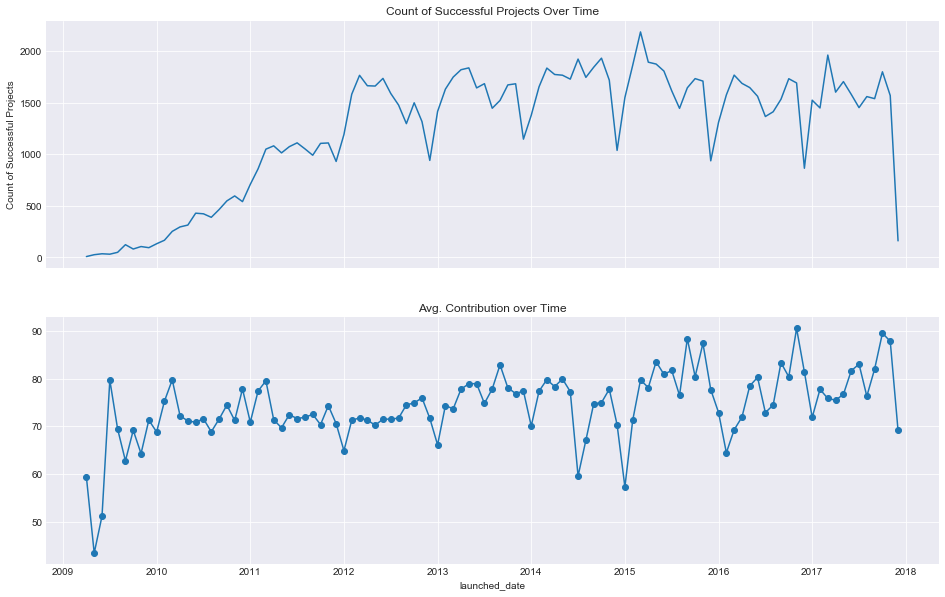

In [133]:
sns.set_style("darkgrid")
fig=plt.figure(figsize=(16,10))

ax1 = plt.subplot(211)
kickstarted.resample('M')['ID'].count().plot(ax=ax1)
plt.xlabel('Launched Date')
plt.ylabel('Count of Successful Projects')
plt.title('Count of Successful Projects Over Time')

ax2 = plt.subplot(212, sharex=ax1)
plt.title("Avg. Contribution over Time")
dset.resample('M').mean()['contribution_av'].plot(marker='o', ax=ax2)

In [134]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326112 entries, 2015-08-11 to 2011-07-19
Data columns (total 20 columns):
ID                      326112 non-null int64
name                    326109 non-null object
category                326112 non-null object
main_category           326112 non-null object
currency                326112 non-null object
deadline                326112 non-null object
goal                    326112 non-null float64
launched                326112 non-null object
pledged                 326112 non-null float64
state                   326112 non-null object
backers                 326112 non-null int64
country                 326112 non-null object
usd pledged             326112 non-null float64
usd_pledged_real        326112 non-null float64
usd_goal_real           326112 non-null float64
launched_date           326112 non-null datetime64[ns]
deadline_date           326112 non-null datetime64[ns]
result                  326112 non-null int64
funding_w

In [135]:
projects.loc[projects['usd_pledged_real'] == projects['usd_pledged_real'].max()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,result,funding_window_days,funding_window_weeks
launched_date,,,,,,,,,,,,,,,,,,,,
2015-02-24,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015-02-24,2015-03-28,1,32,4
